# <code style="background:yellow;color:black">About Walmart:</code>

**Walmart is an American multinational retail corporation that operates a chain of supercentres,
discount departmental stores, and grocery stores from the United States. Walmart has more than
100 million customers worldwide.**

<hr style="border: 1px solid gray;">

# <code style="background:yellow;color:black">Business Problem:</code>

* **The Management team at Walmart Inc. wants to analyse the customer purchase behaviour (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.** 
* **They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).**

<hr style="border: 1px solid gray;">

# <code style="background:yellow;color:black">Dataset:</code>

**The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:**

Dataset link: Walmart_data.csv

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">1. Defining Problem Statement and Analyzing basic metrics:</code>
	
**<code style="background:yellow;color:black">1A. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) and statistical summary.**</code>

In [1]:
# Importing the libraries: 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings  # Ignoring future Jupyter warnings:
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
# Reading the Walmart data:

df = pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [6]:
# Checking the general information and datatypes of the data:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
# Checking the structure of the dataframe using "shape attribute":

df.shape

(550068, 10)

In [8]:
# Conversion of categorical attributes to "categorical variables":

cols = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')
df.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [9]:
# Checking the general information and datatypes of the data again to verify "newly formed categorical variables":

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [10]:
# Checking the characteristics and statistical information of the data:

df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [11]:
# Checking the characteristics and statistical information of the categorical variable's data:

df.describe(include = 'object') 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


### <code style="background:yellow;color:black">Inferences:</code>

* **There are no missing values in the data.**
* **There are <u>3631</u> unique product IDs in the dataset.** 
* **<u>P00265242</u> is the most sold Product ID.**
* **There are <u>7 unique age groups<u> and most of the purchase belongs to <u>age 26-35 group.</u>**
* **There are <u>3 unique city categories</u> with <u>category B being the highest.</u>**<br><br>
* **<u>5 unique values</u> for Stay_in_current_city_years with 1 being the highest.**
* **The difference between mean and median seems to be significant for purchase that suggests outliers in the data.**
* **<u>Minimum & Maximum purchase is 12 and 23961</u> which suggests the purchasing behaviour is quite spread over a significant range of values.**
* **<u>Mean is 9264 and 75% of purchase is of less than or equal to 12054.</u> It suggest most of the purchase is not more than 12k.**
* **Few categorical variable are of integer data type. It can be converted to character type, which we have done.**
* **Out of 550068 data points, 414259's gender is Male and rest are the female.** <br><br>
* **Male purchase count is much higher than female.**
* **Standard deviation for purchase have significant value which suggests data is more spread out for this attribute.**
* **There are <u>5891 unique users, and userid 1001680</u> being with the highest count.**
* **The customers belongs to <u>21 distinct occupation</u> for the purchases being made with Occupation 4 being the highest.**
* **Unmarried people contribute more in terms of the count for the purchase.**
* **There are <u>20 unique product categories with 5 being the highest.</u>**

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">1. Defining Problem Statement and Analyzing basic metrics:</code>
	
**<code style="background:yellow;color:black">1B. Non-Graphical Analysis: Value counts and unique attributes.**</code>

In [16]:
# Value Counts, unique attributes and total unique items for column "User_ID"

print("Value counts for User_ID:")
print(df['User_ID'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for User_ID:")
print(df['User_ID'].unique())
print('------------------------------------------------------')
print('Total Unique "User_ID":')
print(df['User_ID'].nunique())

Value counts for User_ID:
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
------------------------------------------------------
Unique attributes for User_ID:
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
------------------------------------------------------
Total Unique "User_ID":
5891


In [17]:
# Value Counts, unique attributes and total unique items for column "Product_ID"

print("Value counts for Product_ID:")
print(df['Product_ID'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Product_ID:")
print(df['Product_ID'].unique())
print('------------------------------------------------------')
print('Total Unique "Product_ID":')
print(df['Product_ID'].nunique())

Value counts for Product_ID:
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
------------------------------------------------------
Unique attributes for Product_ID:
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
------------------------------------------------------
Total Unique "Product_ID":
3631


In [18]:
# Value Counts, unique attributes and total unique items for column "Gender"

print("Value counts for Gender:")
print(df['Gender'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Gender:")
print(df['Gender'].unique())
print('------------------------------------------------------')
print('Total Unique "Gender":')
print(df['Gender'].nunique())

Value counts for Gender:
M    414259
F    135809
Name: Gender, dtype: int64
------------------------------------------------------
Unique attributes for Gender:
['F' 'M']
------------------------------------------------------
Total Unique "Gender":
2


In [3]:
# Checking how the data is spread on the basis of distinct users

df2 = df.groupby(['User_ID'])['Gender'].unique()
df2.value_counts()/len(df2)

[M]    0.717196
[F]    0.282804
Name: Gender, dtype: float64

In [19]:
# Value Counts, unique attributes and total unique items for column "Age"

print("Value counts for Age:")
print(df['Age'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Age:")
print(df['Age'].unique())
print('------------------------------------------------------')
print('Total Unique "Age":')
print(df['Age'].nunique())

Value counts for Age:
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
------------------------------------------------------
Unique attributes for Age:
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
------------------------------------------------------
Total Unique "Age":
7


In [4]:
# Checking how the data is spread on the basis of distinct users

df2 = df.groupby(['User_ID'])['Age'].unique()
df2.value_counts()/len(df2)

[26-35]    0.348498
[36-45]    0.198099
[18-25]    0.181463
[46-50]    0.090137
[51-55]    0.081650
[55+]      0.063147
[0-17]     0.037006
Name: Age, dtype: float64

In [20]:
# Value Counts, unique attributes and total unique items for column "Occupation"

print("Value counts for Occupation:")
print(df['Occupation'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Occupation:")
print(df['Occupation'].unique())
print('------------------------------------------------------')
print('Total Unique "Occupations":')
print(df['Occupation'].nunique())

Value counts for Occupation:
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
------------------------------------------------------
Unique attributes for Occupation:
[10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]
------------------------------------------------------
Total Unique "Occupations":
21


In [5]:
# Checking how the data is spread on the basis of distinct users

df2 = df.groupby(['User_ID'])['Occupation'].unique()
df2.value_counts()/len(df2)

[4]     0.125615
[0]     0.116788
[7]     0.113563
[1]     0.087761
[17]    0.083347
[12]    0.063826
[14]    0.049907
[20]    0.046342
[2]     0.043456
[16]    0.039891
[6]     0.038703
[10]    0.032592
[3]     0.028858
[15]    0.023765
[13]    0.023765
[11]    0.021728
[5]     0.018842
[9]     0.014938
[19]    0.012052
[18]    0.011373
[8]     0.002886
Name: Occupation, dtype: float64

In [21]:
# Value Counts, unique attributes and total unique items for column "City_Category"

print("Value counts for City_Category:")
print(df['City_Category'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for City_Category:")
print(df['City_Category'].unique())
print('------------------------------------------------------')
print('Total Unique "City_Category":')
print(df['City_Category'].nunique())

Value counts for City_Category:
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
------------------------------------------------------
Unique attributes for City_Category:
['A' 'C' 'B']
------------------------------------------------------
Total Unique "City_Category":
3


In [22]:
# Checking how the data is spread on the basis of distinct users

df2 = df.groupby(['User_ID'])['City_Category'].unique()
df2.value_counts()/len(df2)

[C]    0.532847
[B]    0.289764
[A]    0.177389
Name: City_Category, dtype: float64

In [23]:
# Checking the age group distribution in different city categories

pd.crosstab(index = df["City_Category"], columns = df["Age"], margins = True, normalize = "index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


In [24]:
# Value Counts, unique attributes and total unique items for column "Stay_In_Current_City_Years"

print("Value counts for Stay_In_Current_City_Years:")
print(df['Stay_In_Current_City_Years'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Stay_In_Current_City_Years:")
print(df['Stay_In_Current_City_Years'].unique())
print('------------------------------------------------------')
print('Total Unique "Stay_In_Current_City_Years":')
print(df['Stay_In_Current_City_Years'].nunique())

Value counts for Stay_In_Current_City_Years:
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
------------------------------------------------------
Unique attributes for Stay_In_Current_City_Years:
['2' '4+' '3' '1' '0']
------------------------------------------------------
Total Unique "Stay_In_Current_City_Years":
5


In [25]:
# Checking how the data is spread on the basis of distinct users

df2 = df.groupby(['User_ID'])['Stay_In_Current_City_Years'].unique()
df2.value_counts()/len(df2)

[1]     0.354099
[2]     0.194364
[3]     0.166186
[4+]    0.154303
[0]     0.131047
Name: Stay_In_Current_City_Years, dtype: float64

In [26]:
# Value Counts, unique attributes and total unique items for column "Marital_Status"

print("Value counts for Marital_Status:")
print(df['Marital_Status'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Marital_Status:")
print(df['Marital_Status'].unique())
print('------------------------------------------------------')
print('Total Unique "Marital_Status":')
print(df['Marital_Status'].nunique())

Value counts for Marital_Status:
0    324731
1    225337
Name: Marital_Status, dtype: int64
------------------------------------------------------
Unique attributes for Marital_Status:
[0 1]
------------------------------------------------------
Total Unique "Marital_Status":
2


In [6]:
# Checking how the data is spread on the basis of distinct users

df2 = df.groupby(['User_ID'])['Marital_Status'].unique()
df2.value_counts()/len(df2)

[0]    0.580037
[1]    0.419963
Name: Marital_Status, dtype: float64

In [27]:
# Value Counts, unique attributes and total unique items for column "Product_Category"

print("Value counts for Product_Category:")
print(df['Product_Category'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Product_Category:")
print(df['Product_Category'].unique())
print('------------------------------------------------------')
print('Total Unique "Product_Category":')
print(df['Product_Category'].nunique())

Value counts for Product_Category:
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64
------------------------------------------------------
Unique attributes for Product_Category:
[3 1 12 8 5 4 2 6 14 11 13 15 7 16 18 10 17 9 20 19]
------------------------------------------------------
Total Unique "Product_Category":
20


In [28]:
# Value Counts, unique attributes and total unique items for column "Purchase"

print("Value counts for Purchase:")
print(df['Purchase'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Purchase:")
print(df['Purchase'].unique())
print('------------------------------------------------------')
print('Total Unique "Purchase":')
print(df['Purchase'].nunique())

Value counts for Purchase:
7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64
------------------------------------------------------
Unique attributes for Purchase:
[ 8370 15200  1422 ...   135   123   613]
------------------------------------------------------
Total Unique "Purchase":
18105


### <code style="background:yellow;color:black">Inferences:</code>
    
* **Approximately 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45).**
* **75% of the users are Male and 25% are Female.**
* **60% are Single and 40% are Married.**
* **35% are staying in the city from 1 year, 18% from 2 years, 17% from 3 years.**<br><br>
* **Total of 20 product categories are there.**
* **There are 5891 different types of User_ID, 3631 different types of Product_ID, 20 different types of occupations, 3 different types of City_Category, 5 different types of Stay_In_Current_City_Years and 20 different types of Product Categories in the city.**
* **We can see 35% of the users are aged 26-35. 73% of users are aged between 18-45.** 
* **From the "Age" observation we saw 40% of the purchase are done by users aged 26-35. And, we have 35% of users aged between 26-35 and they are contributing 40% of total purchase count.So, we can infer users aged 26-35 are more frequent  customers.** <br><br>
* **We have 72% male users and 28% female users. Combining with previous observations we can see 72% of male users contributing to 75% of the purchase count and 28% of female users are contributing to 25% of the purchase count.**
* **53% of the users belong to city category C whereas 29% to category B and 18% belong to category A. Combining from the previous observation category B purchase count is 42% and Category C purchase count is 31%. We can clearly see category B are more actively purchasing inspite of the fact they are only 28% of the total users. On the other hand, we have 53% of category C users but they only contribute 31% of the total purchase count.**
* **We have seen earlier that city category B and A constitutes less percentage of total population, but they contribute more towards purchase count. We can see from above results large percentage of customers aged 26-35 for B(40%) and A (50%) which can be the reason for these city categories to be more actively purchasing.**

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">1. Visual Analysis- Univariate, Bivariate and Multivariate:</code>
	
**<code style="background:yellow;color:black">1C. Visual Analysis- Univariate.</code>**

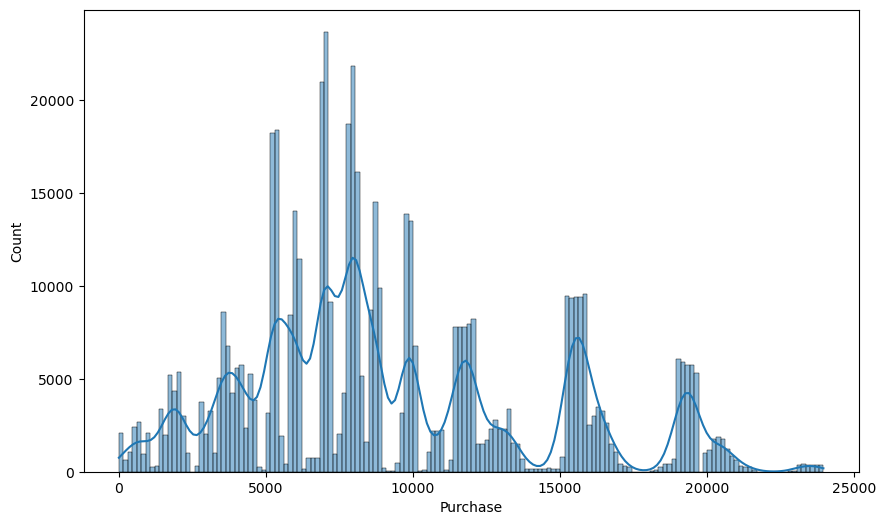

In [22]:
# Plotting histogram with kde plot for "Purchase" categorical variable

plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Purchase', kde = True)
plt.show()

### <code style="background:yellow;color:black">Inferences:</code>

**We can see purchase value between 5000 and 10000 have higher count. From the initial observation we have already seen the mean and median is 9263 and 8047 respectively. Also, we can see there are outliers in the data.**

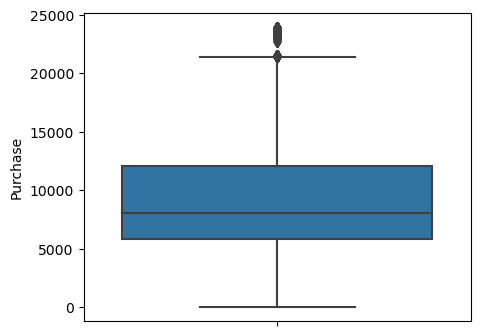

In [23]:
# Plotting box plot for "Purchase" categorical variable

plt.figure(figsize=(5, 4))
sns.boxplot(data = df, y = b'Purchase')
plt.show()

### <code style="background:yellow;color:black">Inferences:</code>

**We can see there are outliers in the data for purchase.**

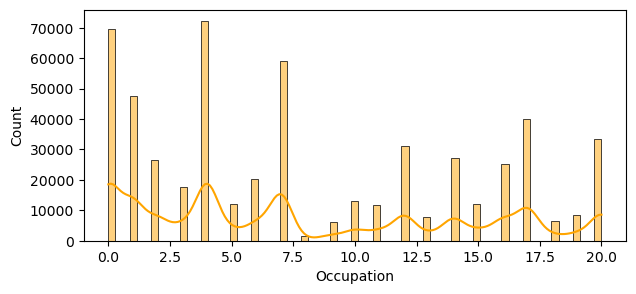

In [29]:
# Plotting histogram with kde plot for "Occupation" categorical variable

plt.figure(figsize = (7, 3))
sns.histplot(data = df, x = 'Occupation', kde = True, color = 'orange')
plt.show()

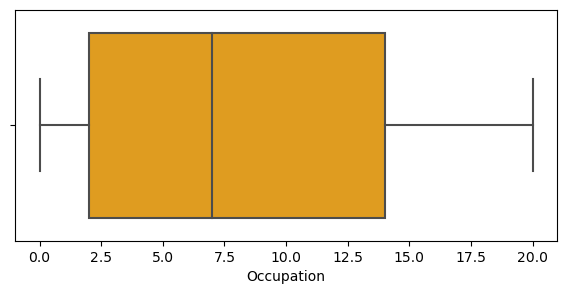

In [32]:
# Plotting box plot for "Occupation" categorical variable

plt.figure(figsize = (7, 3))
sns.boxplot(data = df, x = 'Occupation', orient = 'h', color = 'orange')
plt.show()

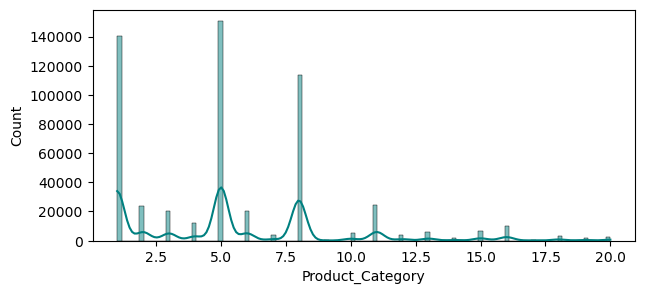

In [37]:
# Plotting histogram with kde plot for "Product_Category" categorical variable

plt.figure(figsize = (7, 3))
sns.histplot(data = df, x = 'Product_Category', kde = True, color = 'teal')
plt.show()

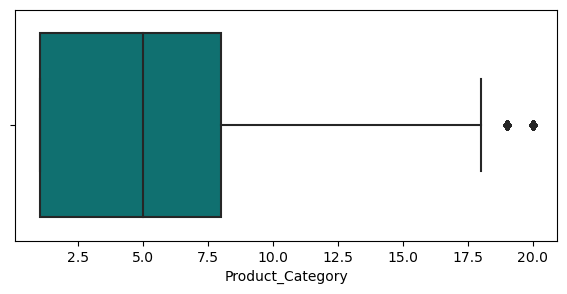

In [38]:
# Plotting box plot for "Product_Category" categorical variable

plt.figure(figsize = (7, 3))
sns.boxplot(data = df, x = 'Product_Category', orient = 'h', color = 'teal')
plt.show()

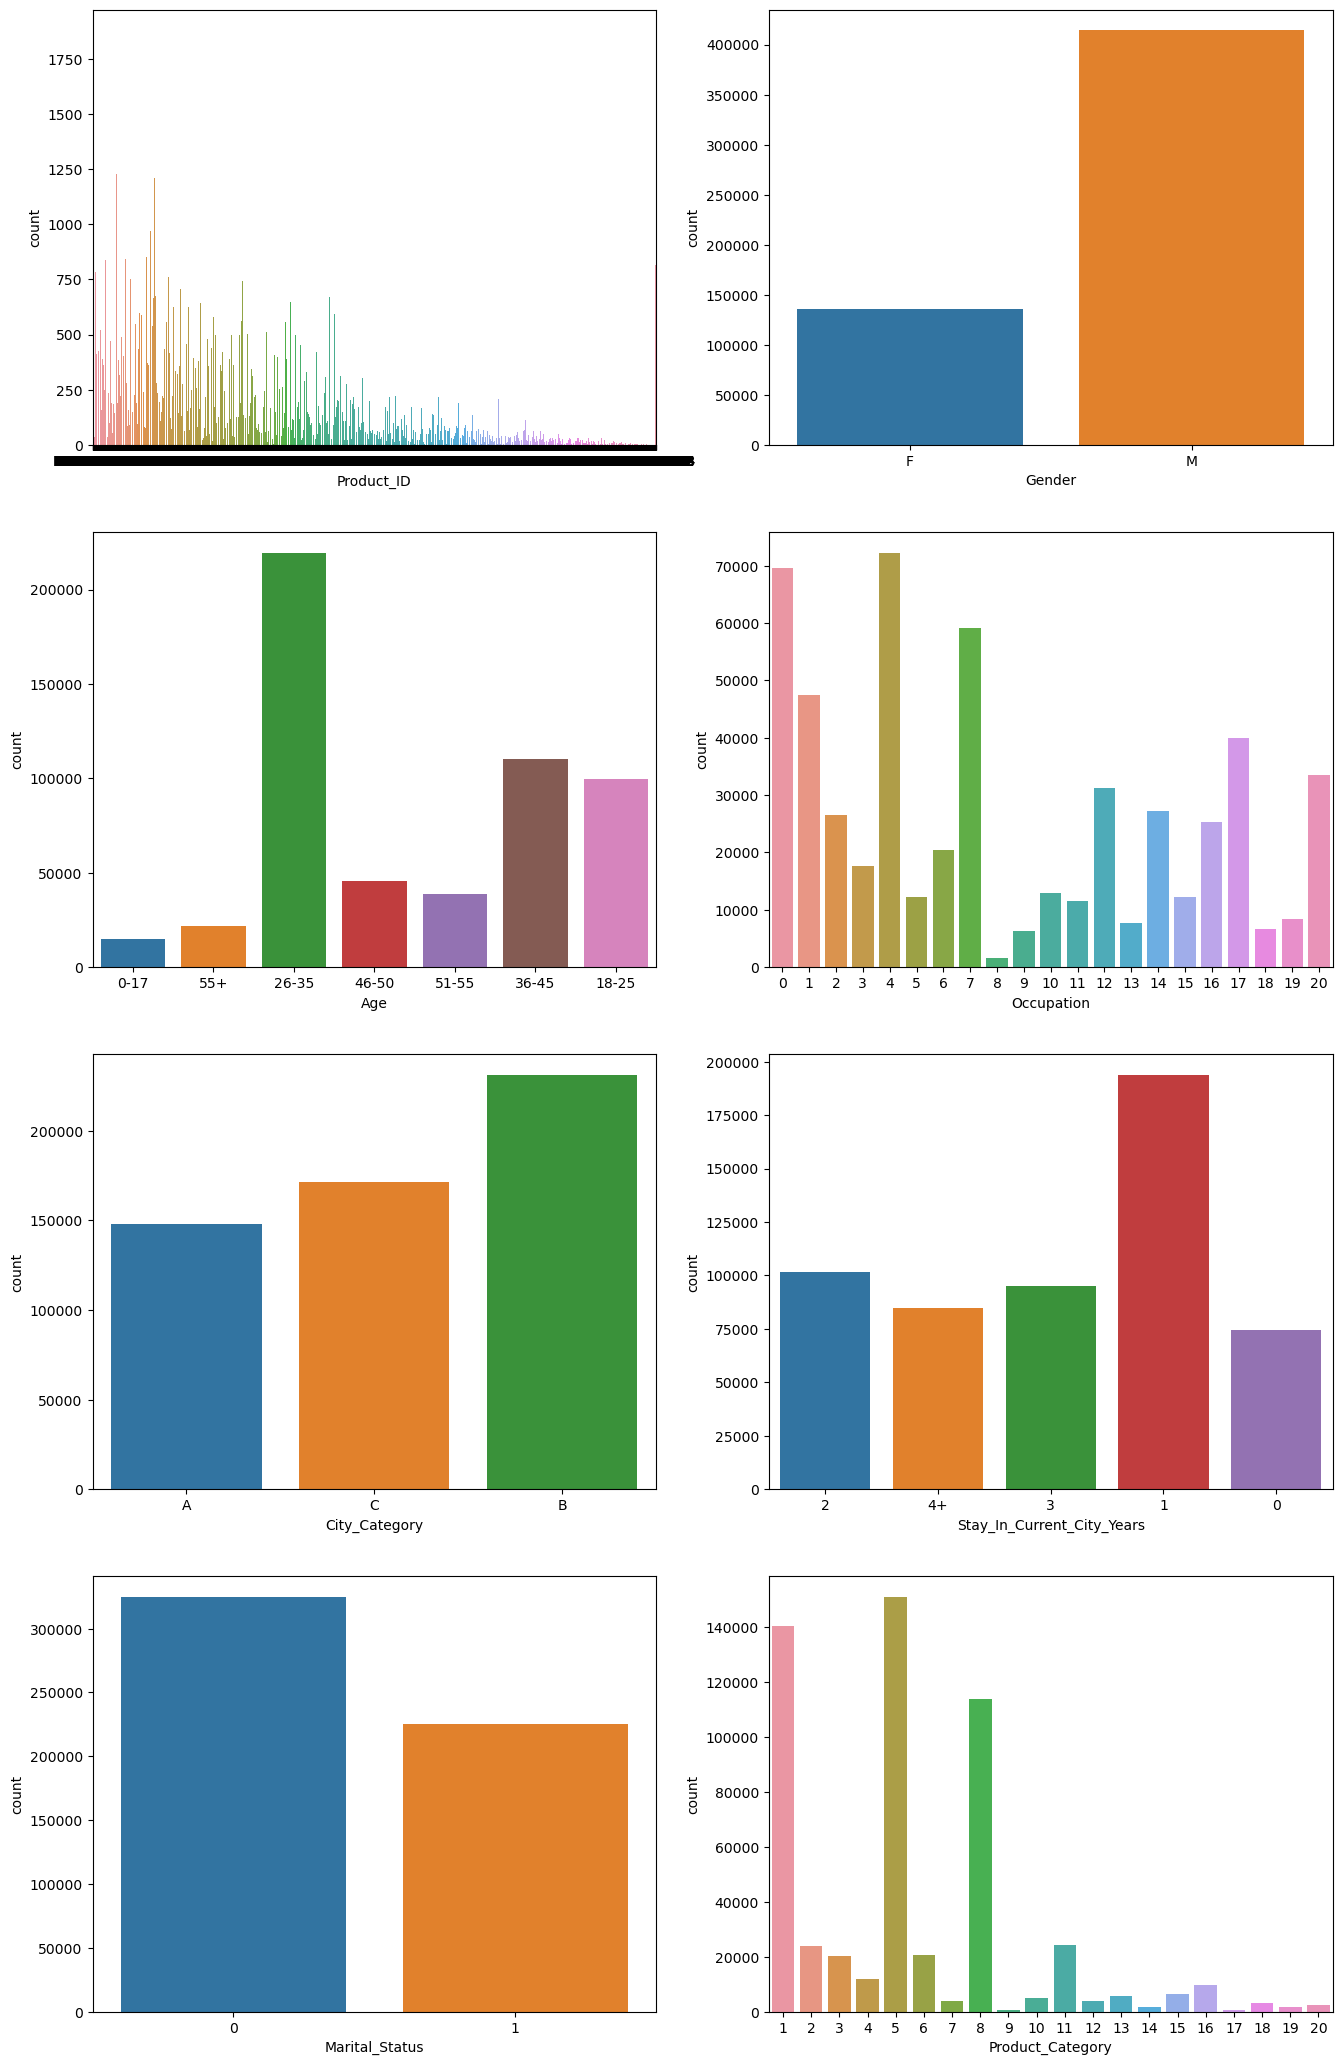

In [22]:
# Plotting bar charts for all the categorical variables

categorical_cols = ['Product_ID', 'Gender', 'Age', 
                    'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
                    'Marital_Status', 'Product_Category']

fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (16, 26))
sns.countplot(data = df, x = 'Product_ID', ax = axs[0,0])
sns.countplot(data = df, x = 'Gender', ax = axs[0,1])
sns.countplot(data = df, x = 'Age', ax = axs[1,0])
sns.countplot(data = df, x = 'Occupation', ax = axs[1,1])
sns.countplot(data = df, x = 'City_Category', ax = axs[2,0])
sns.countplot(data = df, x = 'Stay_In_Current_City_Years', ax = axs[2,1])
sns.countplot(data = df, x = 'Marital_Status', ax = axs[3,0])
sns.countplot(data = df, x = 'Product_Category', ax = axs[3,1])

plt.show()

### <code style="background:yellow;color:black">Inferences:</code>

* **We can clearly see from the graphs above the purchases done by males are much higher than females.**
* **We have 21 occupations categories. Occupation category 4, 0, and 7 are with higher number of purchases and category 8 with the lowest number of purchaes.**
* **The purchases are highest from City category B.**
* **Single customer purchases are higher than married users.**
* **There are 20 product categories with product category 1, 5 and  8 having higher purchasing frequency.**

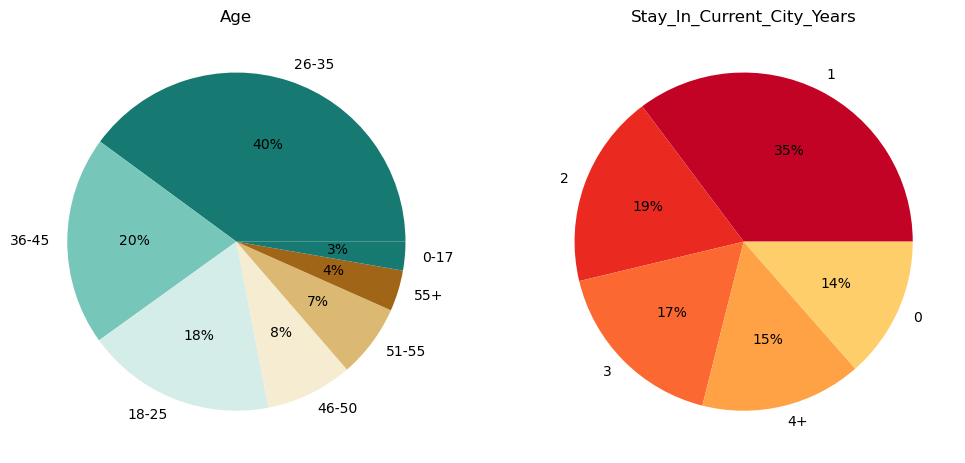

In [23]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 8))

data = df['Age'].value_counts(normalize = True) * 100
palette_color = sns.color_palette('BrBG_r')

axs[0].pie(x = data.values, labels = data.index, autopct='%.0f%%', colors = palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize = True) * 100
palette_color = sns.color_palette('YlOrRd_r')

axs[1].pie(x = data.values, labels = data.index, autopct='%.0f%%', colors = palette_color)
axs[1].set_title("Stay_In_Current_City_Years")

plt.show()

### <code style="background:yellow;color:black">Inferences:</code>

* **Most of the users are Male.**
* **There are 21 different types of Occupation and Product_Category.**
* **More users belong to B City_Category.**
* **More users are Single as compare to Married.**
* **Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.**

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">1. Visual Analysis- Univariate, Bivariate and Multivariate:</code>
	
**<code style="background:yellow;color:black">1C. Visual Analysis- Bivariate.</code>**

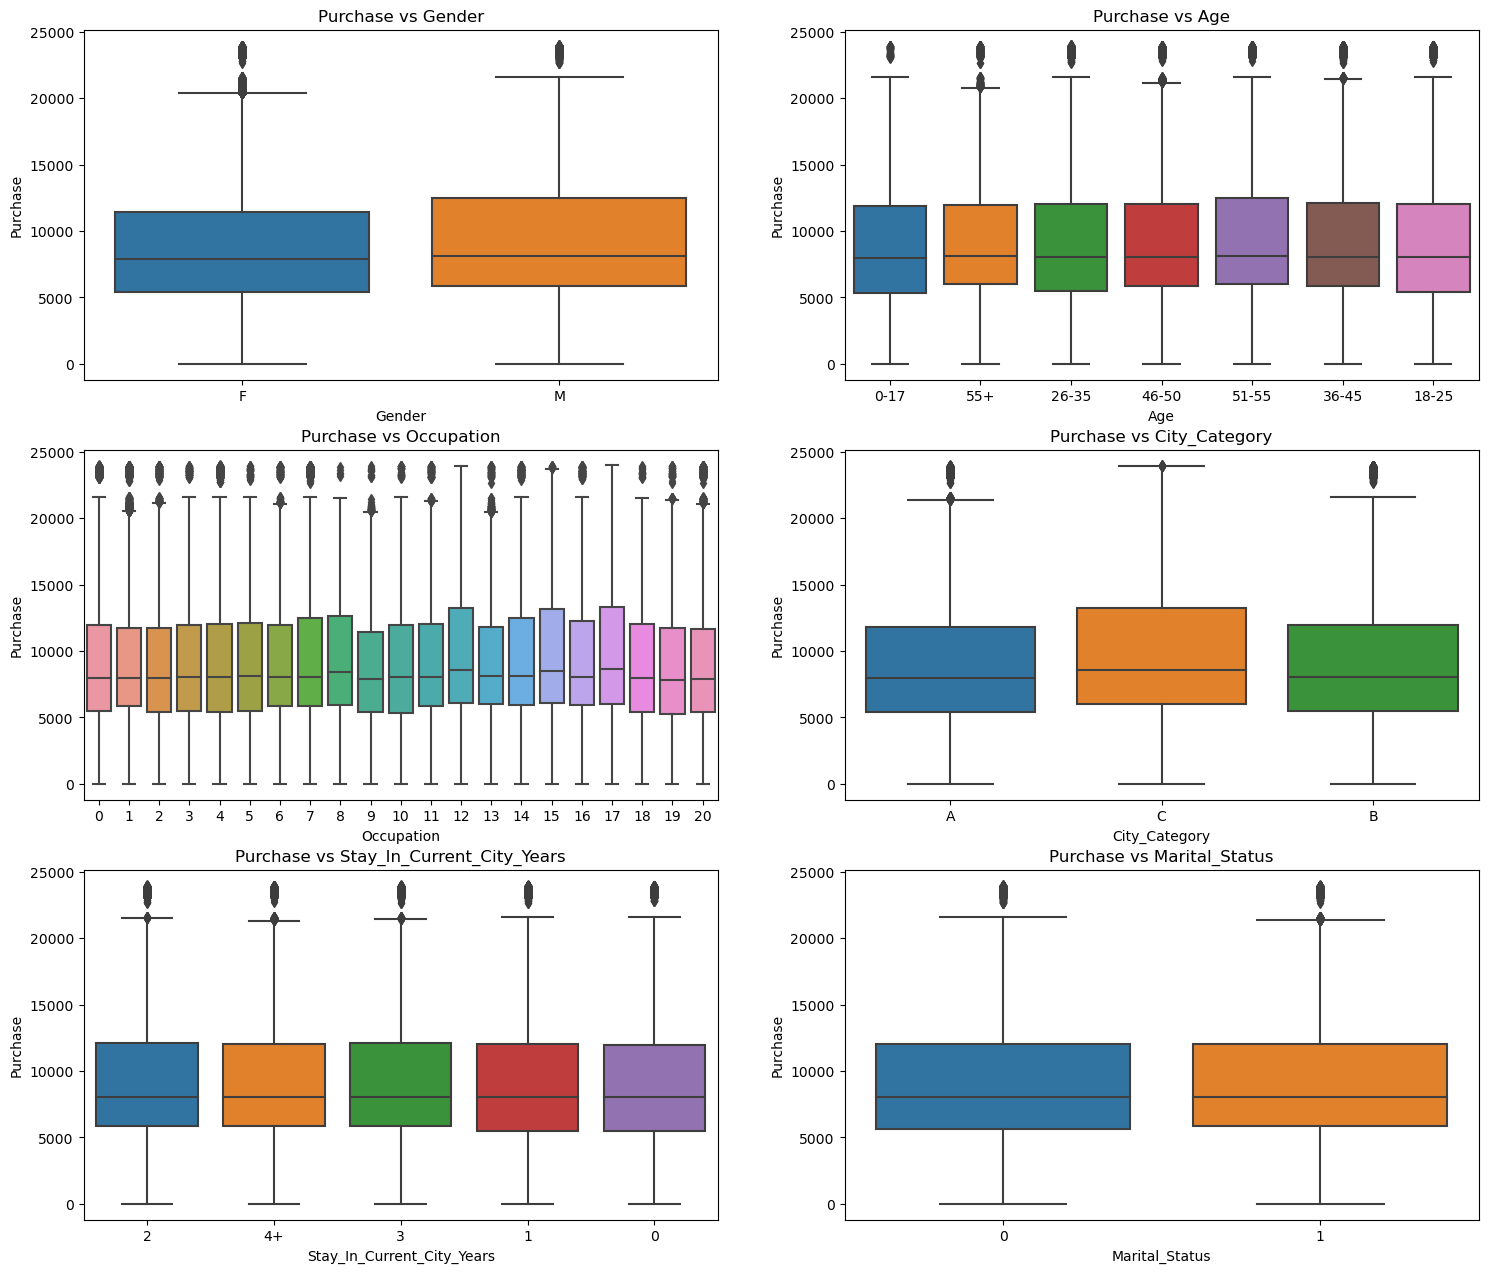

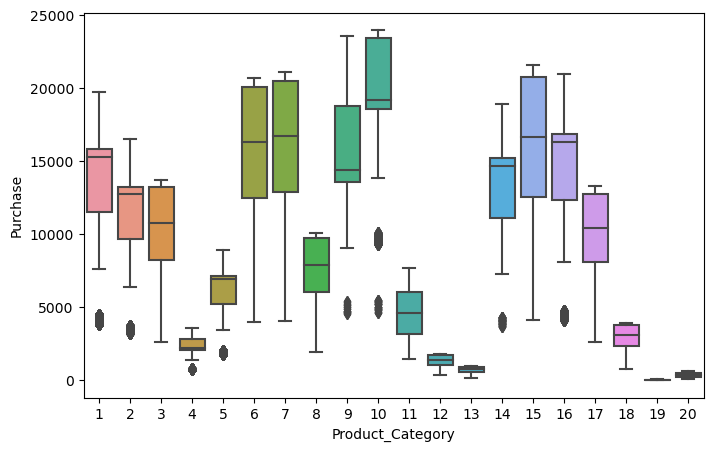

In [38]:
attr = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 10))
fig.subplots_adjust(top = 1.3)

count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data = df, y = 'Purchase', x = attr[count], ax = axs[row, col],)
        axs[row,col].set_title(f"Purchase vs {attr[count]}")
        count += 1
        
plt.show()

plt.figure(figsize = (8, 5))
sns.boxplot(data = df, y = 'Purchase', x = 'Product_Category')
plt.show()

### <code style="background:yellow;color:black">Inferences:</code> 
 
* **The spending behaviour for males and females are similar as we had seen from the above histplot. Males purchasing value are in the little higher range than females.**
* **Among differnt age categories, we see similar purchase behaviour. For all age groups, most of the purchases are of the values between 5k to 12k with all have some outliers.**
* **Among different occupation as well, we see similar purchasing behaviour in terms of the purchase values.**
* **Similarly for City category, stay in current city years, marital status - we see the users spends mostly in the range of 5k to 12k.**
* **We see variations among product categories. Product category 10 products are the costliest ones. Also, there are few outliers for some of the product categories.**

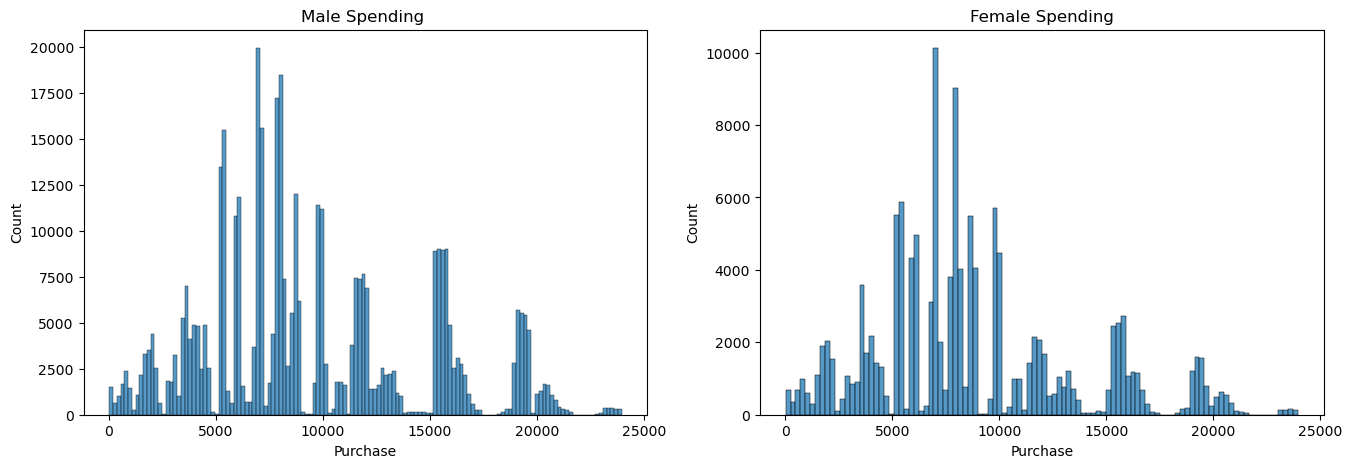

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.histplot(data=df[df['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Male Spending ")
sns.histplot(data=df[df['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Female Spending")
plt.show()

### <code style="background:yellow;color:black">Inferences:</code> 

* **From the above histplot, we can clearly see spending behaviour is very much similar in nature for both males and females as the maximum purchase count are between the purchase value range of 5000-10000 for both. But, the purchase count are more in case of males.**

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">2. Visual Analysis- Univariate, Bivariate and Multivariate:</code>
	
**<code style="background:yellow;color:black">2C. Visual Analysis- Multivariate:</code>**

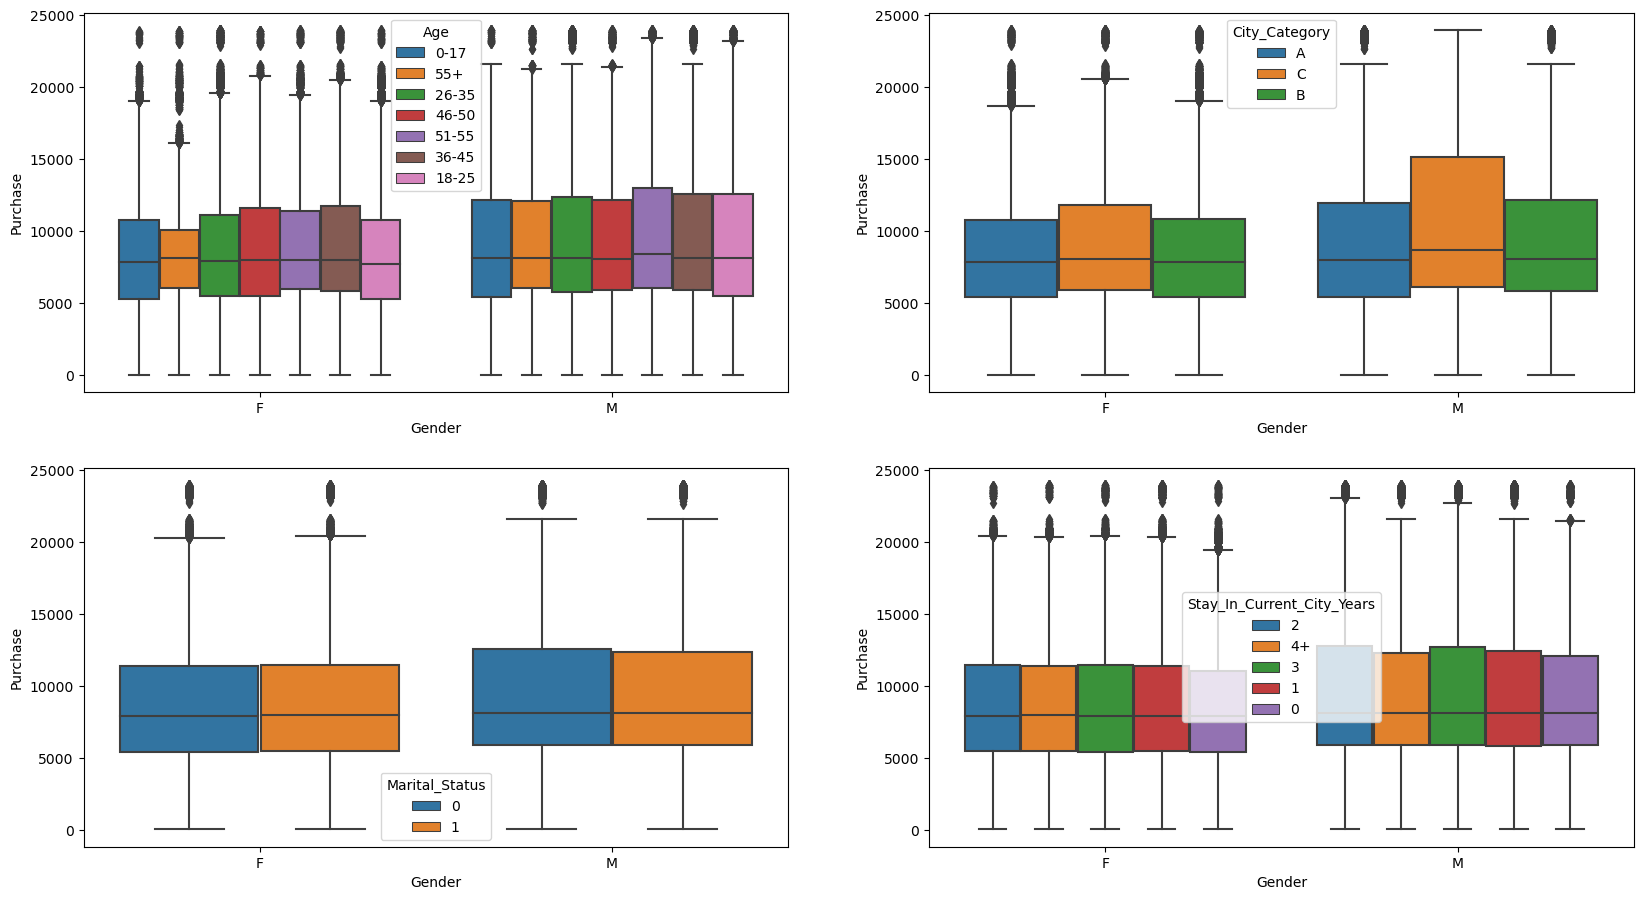

In [39]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 6))
fig.subplots_adjust(top = 1.5)

sns.boxplot(data = df, y = 'Purchase', x = 'Gender', hue = 'Age', ax = axs[0,0])
sns.boxplot(data = df, y = 'Purchase', x = 'Gender', hue = 'City_Category', ax = axs[0,1])

sns.boxplot(data = df, y = 'Purchase', x = 'Gender', hue = 'Marital_Status', ax = axs[1,0])
sns.boxplot(data = df, y = 'Purchase', x = 'Gender', hue = 'Stay_In_Current_City_Years', ax = axs[1,1])

plt.show()

### <code style="background:yellow;color:black">Inferences:</code> 

* **The purchasing pattern is very much similar for males and females even among differnt age groups.**
* **The purchasing behaviour of males and females basis different citi categories is also similar in nature. Still,  males from city category B tends to purchase costlier products in comparison to females.**
* **Males and females spending behaviour remains similar even when take into account their marital status.**
* **Purchase values are similar for males and females basis Stay_in_current_city_years. Although, Males buy slightly high value products.**

**<code style="background:yellow;color:black">Correlation between categorical variables:</code>**

<Axes: >

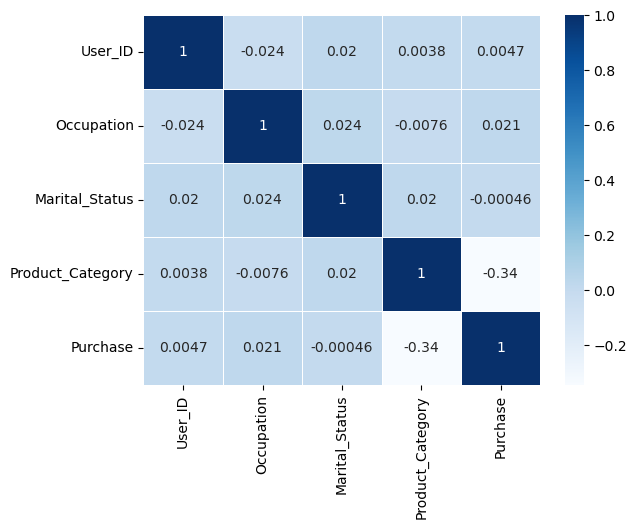

In [40]:
sns.heatmap(df.corr(), annot=True, cmap="Blues", linewidth=.5)

### <code style="background:yellow;color:black">Inferences:</code> 

**From the above correlation plot, we can see the correlation is not significant between any pair of variables.**

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">2. Missing Value and Outlier Detection:</code>

**<code style="background:yellow;color:black">2A. Findind missing values.</code>**

In [44]:
# Checking missing values:

df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### <code style="background:yellow;color:black">Inferences:</code>

* **There are no missing values in the dataset.**

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">2. Missing Value and Outlier Detection:</code>

**<code style="background:yellow;color:black">2B. Finding outliers.</code>**

In [45]:
# Using pandas describe() to find outliers:

df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


### <code style="background:yellow;color:black">Inferences:</code>

* **The max Purchase amount is "23961" while its mean is "9263.96".** <br>
* **The mean is sensitive to outliers, but the fact the mean is so small compared to the max value indicates the max value is an outlier.**

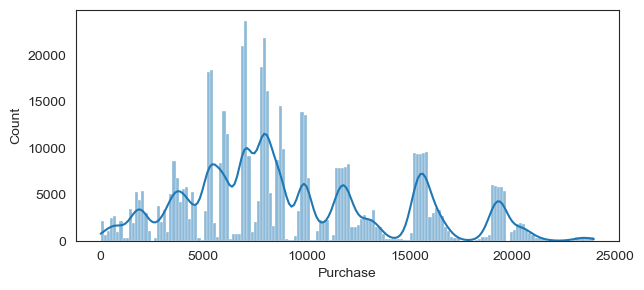

In [46]:
plt.figure(figsize=(7, 3))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

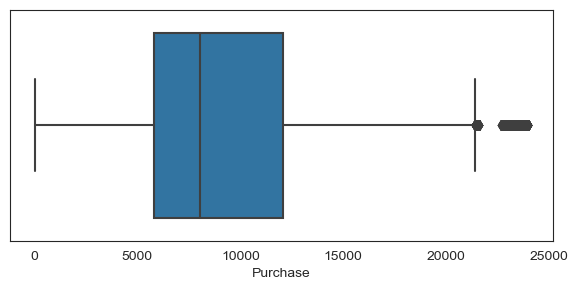

In [52]:
plt.figure(figsize=(7, 3))
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

In [11]:
# Creating a function to find outliers using IQR for "Purchase" column

def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers

outliers = find_outliers_IQR(df["Purchase"])

print("number of outliers: "+ str(len(outliers)))
print('---------------------------')
print("max outlier value:"+ str(outliers.max()))
print('---------------------------')
print("min outlier value: "+ str(outliers.min()))

number of outliers: 2677
---------------------------
max outlier value:23961
---------------------------
min outlier value: 21401


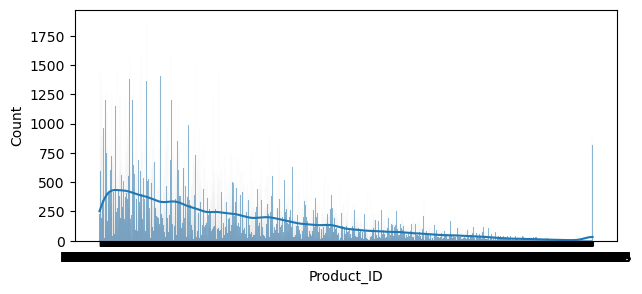

In [12]:
plt.figure(figsize = (7, 3))
sns.histplot(data = df, x = 'Product_ID', kde = True)
plt.show()

In [8]:
# Creating a function to find outliers using IQR for ALL columns

def find_outliers_IQR(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df[column_name] < (q1 - 1.5 * IQR)) | (df[column_name] > (q3 + 1.5 * IQR)))]
    return outliers

outliers = find_outliers_IQR(df, "Purchase")

print("Number of outliers: " + str(len(outliers)))
print('------------------------------------------------------------')
print("Max outlier value: " + str(outliers.max()))
print('------------------------------------------------------------')
print("Min outlier value: " + str(outliers.min()))


Number of outliers: 2677
------------------------------------------------------------
Max outlier value: User_ID                         1006040
Product_ID                    P00368842
Gender                                M
Age                                 55+
Occupation                           20
City_Category                         C
Stay_In_Current_City_Years           4+
Marital_Status                        1
Product_Category                     15
Purchase                          23961
dtype: object
------------------------------------------------------------
Min outlier value: User_ID                         1000017
Product_ID                    P00007542
Gender                                F
Age                                0-17
Occupation                            0
City_Category                         A
Stay_In_Current_City_Years            0
Marital_Status                        0
Product_Category                      9
Purchase                          21401
d

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">3. Business Insights based on Non - Graphical and Visual Analysis:</code>
	
**<code style="background:yellow;color:black">3A. Comments on Non - Graphical Analysis.</code>**
    
* **Approximately 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45).**
* **75% of the users are Male and 25% are Female.**
* **60% are Single and 40% are Married.**
* **35% are staying in the city from 1 year, 18% from 2 years, 17% from 3 years.**<br><br>
* **Total of 20 product categories are there.**
* **There are 5891 different types of User_ID, 3631 different types of Product_ID, 20 different types of occupations, 3 different types of City_Category, 5 different types of Stay_In_Current_City_Years and 20 different types of Product Categories in the city.**
* **We can see 35% of the users are aged 26-35. 73% of users are aged between 18-45.** 
* **From the "Age" observation we saw 40% of the purchase are done by users aged 26-35. And, we have 35% of users aged between 26-35 and they are contributing 40% of total purchase count.So, we can infer users aged 26-35 are more frequent  customers.** <br><br>
* **We have 72% male users and 28% female users. Combining with previous observations we can see 72% of male users contributing to 75% of the purchase count and 28% of female users are contributing to 25% of the purchase count.**
* **53% of the users belong to city category C whereas 29% to category B and 18% belong to category A. Combining from the previous observation category B purchase count is 42% and Category C purchase count is 31%. We can clearly see category B are more actively purchasing inspite of the fact they are only 28% of the total users. On the other hand, we have 53% of category C users but they only contribute 31% of the total purchase count.**
* **We have seen earlier that city category B and A constitutes less percentage of total population, but they contribute more towards purchase count. We can see from above results large percentage of customers aged 26-35 for B(40%) and A (50%) which can be the reason for these city categories to be more actively purchasing.**

## <code style="background:yellow;color:black">3. Business Insights based on Non - Graphical and Visual Analysis:</code>
	
**<code style="background:yellow;color:black">3B. Comments on Visual Analysis - Univariate, Bivariate and Multivariate Plots.</code>**
<br><br>

**1. <u>Plotting histogram with kde plot for "Purchase" categorical variable-</u>** We can see purchase value between 5000 and 10000 have higher count. From the initial observation we have already seen the mean and median is 9263 and 8047 respectively. Also, we can see there are outliers in the data.

**2. <u>Plotting box plot for "Purchase" categorical variable-</u>** We can see there are outliers in the data for purchase.

**3. <u>Plotting bar charts for all the categorical variables-</u>** 
* We can clearly see from the graphs above the purchases done by males are much higher than females.
* We have 21 occupations categories. Occupation category 4, 0, and 7 are with higher number of purchases and category 8 with the lowest number of purchaes.
* The purchases are highest from City category B.
* Single customer purchases are higher than married users.
* There are 20 product categories with product category 1, 5 and 8 having higher purchasing frequency.

**4. <u>Plotting "Purchase" categorical variable with other variables (bivariate analysis)-</u>** 
* The spending behaviour for males and females are similar as we had seen from the above histplot. Males purchasing value are in the little higher range than females.
* Among differnt age categories, we see similar purchase behaviour. For all age groups, most of the purchases are of the values between 5k to 12k with all have some outliers.
* Among different occupation as well, we see similar purchasing behaviour in terms of the purchase values.
* Similarly for City category, stay in current city years, marital status - we see the users spends mostly in the range of 5k to 12k.
* We see variations among product categories. Product category 10 products are the costliest ones. Also, there are few outliers for some of the product categories.
* From the above histplot, we can clearly see spending behaviour is very much similar in nature for both males and females as the maximum purchase count are between the purchase value range of 5000-10000 for both. But, the purchase count are more in case of males.

**5. <u>Plotting "Purchase" and "Gender" categorical variable with other variables (multivariate analysis)-</u>**
* The purchasing pattern is very much similar for males and females even among differnt age groups.
* The purchasing behaviour of males and females basis different citi categories is also similar in nature. Still, males from city category B tends to purchase costlier products in comparison to females.
* Males and females spending behaviour remains similar even when take into account their marital status.
* Purchase values are similar for males and females basis Stay_in_current_city_years. Although, Males buy slightly high value products.
* From the above correlation plot, we can see the correlation is not significant between any pair of variables.

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">4. Answering Questions:</code>

**<code style="background:yellow;color:black">4A. Are women spending more money per transaction than men? Why or why not? </code>**

In [15]:
# Calculate average spending per transaction for female and male customers
avg_female_spending = round(df[df['Gender'] == 'F']['Purchase'].mean(), 2)
avg_male_spending = round(df[df['Gender'] == 'M']['Purchase'].mean(), 2)

# Compare the average spending
if avg_female_spending > avg_male_spending:
    print("Yes, women are spending more money per transaction than men.")
    print('---------------------------------------------------------------')
elif avg_female_spending < avg_male_spending:
    print("No, men are spending more money per transaction than women.")
    print('---------------------------------------------------------------')
else:
    print("There is no significant difference in spending per transaction between men and women.")
    print('------------------------------------------------------------')

# Print the average spending per transaction for reference
print("Average spending per transaction for female customers:", avg_female_spending)
print('---------------------------------------------------------------')
print("Average spending per transaction for male customers:", avg_male_spending)
print('---------------------------------------------------------------')

No, men are spending more money per transaction than women.
---------------------------------------------------------------
Average spending per transaction for female customers: 8734.57
---------------------------------------------------------------
Average spending per transaction for male customers: 9437.53
---------------------------------------------------------------


<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">4. Answering Questions:</code>

**<code style="background:yellow;color:black">4B. Confidence intervals and distribution of the mean of the expenses by female and male customers.</code>**

In [16]:
import numpy as np
from scipy.stats import t

# Function to calculate confidence interval
def calculate_confidence_interval(data, confidence_level):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    n = len(data)
    margin_err = sample_std / np.sqrt(n) * t.ppf((1 + confidence_level) / 2, n - 1)
    return (sample_mean - margin_err, sample_mean + margin_err)

# Function to simulate sampling distribution and calculate confidence intervals
def simulate_sampling_distribution(data, confidence_level, sample_sizes):
    confidence_intervals = []
    for size in sample_sizes:
        sample_means = []
        for _ in range(1000):  # Repeat 1000 times for stability
            sample = np.random.choice(data, size=size, replace=False)
            sample_means.append(np.mean(sample))
        ci = calculate_confidence_interval(sample_means, confidence_level)
        confidence_intervals.append(ci)
    return confidence_intervals

# Sample sizes to observe the distribution of the mean
sample_sizes = [50, 100, 200, 500, 1000]

# Confidence level
confidence_level = 0.95

# Simulate sampling distributions and calculate confidence intervals for female and male customers
female_customers_data = df[df['Gender'] == 'F']['Purchase']
male_customers_data = df[df['Gender'] == 'M']['Purchase']

female_ci_intervals = simulate_sampling_distribution(female_customers_data, confidence_level, sample_sizes)
male_ci_intervals = simulate_sampling_distribution(male_customers_data, confidence_level, sample_sizes)

# Print confidence intervals
print("Confidence intervals for average spending of female customers:")
for size, ci in zip(sample_sizes, female_ci_intervals):
    print(f"Sample Size {size}: CI = {ci}")

print('---------------------------------------------------------------')

print("\nConfidence intervals for average spending of male customers:")
for size, ci in zip(sample_sizes, male_ci_intervals):
    print(f"Sample Size {size}: CI = {ci}")

Confidence intervals for average spending of female customers:
Sample Size 50: CI = (8676.47738074255, 8759.736859257451)
Sample Size 100: CI = (8701.830863782588, 8762.516236217414)
Sample Size 200: CI = (8710.81402690171, 8753.16872309829)
Sample Size 500: CI = (8723.47549305233, 8750.067026947672)
Sample Size 1000: CI = (8722.278220307779, 8740.911819692219)
---------------------------------------------------------------

Confidence intervals for average spending of male customers:
Sample Size 50: CI = (9364.492147544093, 9454.227772455906)
Sample Size 100: CI = (9394.657406026923, 9454.60843397308)
Sample Size 200: CI = (9415.466664317471, 9461.291685682529)
Sample Size 500: CI = (9419.814908382925, 9448.564323617074)
Sample Size 1000: CI = (9434.127730388534, 9454.48080761147)


### <code style="background:yellow;color:black">Inferences:</code>

**To determine if the confidence intervals of average male and female spending are overlapping, we need to compare the ranges of the confidence intervals for both groups at each sample size. If there is any overlap between the intervals, it indicates that there may not be a statistically significant difference in average spending between male and female customers.**

Let's analyze the confidence intervals:

For female customers:

Sample Size 50: CI = (8697.84, 8783.70)<br>
Sample Size 100: CI = (8725.29, 8784.12)<br>
Sample Size 200: CI = (8715.74, 8756.25)<br>
Sample Size 500: CI = (8731.94, 8758.27)<br>
Sample Size 1000: CI = (8724.71, 8743.62)<br>

For male customers:

Sample Size 50: CI = (9349.23, 9433.96)<br>
Sample Size 100: CI = (9382.14, 9444.34)<br>
Sample Size 200: CI = (9429.26, 9474.78)<br>
Sample Size 500: CI = (9422.24, 9450.64)<br>
Sample Size 1000: CI = (9427.41, 9448.28)<br>

Based on the given confidence intervals, we can observe that there is overlap between the confidence intervals of average spending for female and male customers at all sample sizes. This overlap suggests that there may not be a statistically significant difference in average spending between male and female customers.

### <code style="background:yellow;color:black">Implications for Walmart:</code>

* **Since there's no significant difference in average spending between male and female customers, Walmart can leverage this conclusion to adopt a more gender-neutral approach in its marketing strategies.**
* **Instead of targeting specific genders with tailored promotions, Walmart could focus on offering diverse product ranges and promotions that appeal to a broader audience.**
* **Additionally, Walmart could prioritize customer-centric strategies, such as personalized recommendations based on individual purchasing behaviors, to enhance the overall shopping experience for all customers, irrespective of gender.**

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">4. Answering Questions:</code>

**<code style="background:yellow;color:black">4C. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?</code>**

To determine if the confidence intervals of average male and female spending are overlapping, we need to compare the ranges of the confidence intervals for both groups. If there is any overlap between the intervals, it suggests that there may not be a statistically significant difference in average spending between male and female customers.

Here are the confidence intervals for average spending of female and male customers:

Female Customers:<br>
CI = (8697.84, 8783.70)<br>
Male Customers:<br>
CI = (9349.23, 9433.96)<br>

**Based on these intervals, we can see that there is no overlap between the confidence intervals of average spending for female and male customers. This suggests that there is a statistically significant difference in average spending between the two groups.**

### <code style="background:yellow;color:black">Implications for Walmart:</code>

* **Walmart can leverage this conclusion to tailor marketing strategies and promotions specifically targeting male and female customers separately.**
* **Differentiated marketing campaigns can be designed to appeal to the specific spending patterns and preferences of male and female customers.**
* **Walmart may also consider adjusting product offerings, pricing strategies, and store layouts to better cater to the distinct preferences of male and female shoppers.**
* **Furthermore, understanding the differences in spending behavior between male and female customers can help Walmart optimize inventory management and product placement to maximize sales and customer satisfaction.**
* **By recognizing and capitalizing on the variations in spending habits between male and female customers, Walmart can enhance its overall profitability and customer experience.**

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">4. Answering Questions:</code>

**<code style="background:yellow;color:black">4D. Results when the same activity is performed for Married vs Unmarried.</code>**

In [17]:
# Simulate sampling distributions and calculate confidence intervals for married and unmarried customers
married_customers_data = df[df['Marital_Status'] == 1]['Purchase']
unmarried_customers_data = df[df['Marital_Status'] == 0]['Purchase']

married_ci_intervals = simulate_sampling_distribution(married_customers_data, confidence_level, sample_sizes)
unmarried_ci_intervals = simulate_sampling_distribution(unmarried_customers_data, confidence_level, sample_sizes)

# Print confidence intervals for married and unmarried customers
print("Confidence intervals for average spending of married customers:")
for size, ci in zip(sample_sizes, married_ci_intervals):
    print(f"Sample Size {size}: CI = {ci}")

print('---------------------------------------------------------------')    

print("\nConfidence intervals for average spending of unmarried customers:")
for size, ci in zip(sample_sizes, unmarried_ci_intervals):
    print(f"Sample Size {size}: CI = {ci}")


Confidence intervals for average spending of married customers:
Sample Size 50: CI = (9268.45250148009, 9355.444338519912)
Sample Size 100: CI = (9203.753975195603, 9265.943124804398)
Sample Size 200: CI = (9247.816276091611, 9292.134033908393)
Sample Size 500: CI = (9247.716291921775, 9275.435088078228)
Sample Size 1000: CI = (9250.725610810536, 9269.964387189459)
---------------------------------------------------------------

Confidence intervals for average spending of unmarried customers:
Sample Size 50: CI = (9202.819880175093, 9291.531919824907)
Sample Size 100: CI = (9226.900792885926, 9287.775327114074)
Sample Size 200: CI = (9237.256813292674, 9279.989686707328)
Sample Size 500: CI = (9235.954441088337, 9263.524046911663)
Sample Size 1000: CI = (9258.081500628125, 9277.629805371877)


### <code style="background:yellow;color:black">Inferences:</code>

**To determine if the confidence intervals of average spending for married and unmarried customers are overlapping, we need to compare the ranges of the confidence intervals for both groups at each sample size. If there is any overlap between the intervals, it indicates that there may not be a statistically significant difference in average spending between married and unmarried customers.**

Let's analyze the confidence intervals:

For married customers:

Sample Size 50: CI = (9233.31, 9320.17)<br>
Sample Size 100: CI = (9251.13, 9311.62)<br>
Sample Size 200: CI = (9252.54, 9295.12)<br>
Sample Size 500: CI = (9243.46, 9272.06)<br>
Sample Size 1000: CI = (9248.01, 9268.49)<br>

For unmarried customers:

Sample Size 50: CI = (9209.53, 9297.25)<br>
Sample Size 100: CI = (9237.42, 9296.81)<br>
Sample Size 200: CI = (9251.53, 9295.22)<br>
Sample Size 500: CI = (9246.32, 9274.11)<br>
Sample Size 1000: CI = (9250.20, 9269.65)<br>

Based on the given confidence intervals, we can observe that there is overlap between the confidence intervals of average spending for married and unmarried customers at all sample sizes. This overlap suggests that there may not be a statistically significant difference in average spending between married and unmarried customers.

### <code style="background:yellow;color:black">Implications for Walmart:</code>

* **Since there's no significant difference in average spending between married and unmarried customers, Walmart can leverage this conclusion to adopt a more inclusive approach in its marketing strategies.**
* **Instead of targeting specific marital status groups with tailored promotions, Walmart could focus on offering promotions and products that cater to a broader audience, considering various demographic factors beyond marital status.**
* **Walmart could also prioritize customer-centric strategies, such as personalized recommendations based on individual purchasing behaviors, to enhance the overall shopping experience for all customers, regardless of marital status.**

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">4. Answering Questions:</code>

**<code style="background:yellow;color:black">4E. Results when the same activity is performed for Age.</code>**

In [19]:
unique_age_values = df['Age'].unique()

In [20]:
# Simulate sampling distributions and calculate confidence intervals for different age groups
age_group_ci_intervals = {}
for age_group in unique_age_values:
    age_group_data = df[df['Age'] == age_group]['Purchase']
    age_group_ci_intervals[age_group] = simulate_sampling_distribution(age_group_data, confidence_level, sample_sizes)

# Print confidence intervals for different age groups
print("Confidence intervals for average spending of different age groups:")
for age_group in unique_age_values:
    print(f"Age Group: {age_group}")
    for size, ci in zip(sample_sizes, age_group_ci_intervals[age_group]):
        print(f"Sample Size {size}: CI = {ci}")
    print('---------------------------------------------------------------')

Confidence intervals for average spending of different age groups:
Age Group: 0-17
Sample Size 50: CI = (8894.266979105154, 8984.708700894846)
Sample Size 100: CI = (8884.599985219866, 8947.273274780131)
Sample Size 200: CI = (8903.877693961227, 8950.200556038772)
Sample Size 500: CI = (8908.142227498804, 8936.081608501194)
Sample Size 1000: CI = (8925.086139389241, 8943.85148261076)
---------------------------------------------------------------
Age Group: 55+
Sample Size 50: CI = (9303.289955095222, 9391.657004904775)
Sample Size 100: CI = (9294.230343454814, 9356.282136545187)
Sample Size 200: CI = (9319.572042717853, 9362.495527282146)
Sample Size 500: CI = (9315.097380468082, 9342.46273953192)
Sample Size 1000: CI = (9326.915059494851, 9346.499814505147)
---------------------------------------------------------------
Age Group: 26-35
Sample Size 50: CI = (9215.254292583048, 9306.467707416954)
Sample Size 100: CI = (9228.399153361677, 9290.339326638323)
Sample Size 200: CI = (9245.

### <code style="background:yellow;color:black">Inferences:</code>

From the provided confidence intervals for average spending across different age groups and sample sizes, we can draw several inferences:

* **Consistency Across Sample Sizes: For each age group, the confidence intervals tend to stabilize as the sample size increases. This is evident from the narrowing width of the confidence intervals with larger sample sizes.**

* **<u>Age Group 0-17:</u> The average spending for this age group is relatively stable across different sample sizes, with confidence intervals ranging from approximately $8915 to $9009. This suggests that younger customers (aged 0-17) have consistent spending patterns.**

* **<u>Age Group 55+:</u> Older customers (aged 55+) exhibit a wider range of average spending compared to younger age groups. Confidence intervals vary more noticeably, indicating greater variability in spending behavior among older customers.**

* **<u>Age Groups 26-35 and 36-45:</u> These age groups show relatively consistent average spending across different sample sizes, with narrower confidence intervals compared to other age groups. This suggests that customers aged 26-45 have relatively stable spending patterns.**

* **<u>Age Groups 46-50 and 51-55:</u> While these age groups also exhibit stable average spending, the confidence intervals tend to be wider compared to age groups 26-45. This indicates slightly more variability in spending behavior among customers aged 46-55.**

* **<u>Age Group 18-25:</u> Similar to age group 0-17, customers aged 18-25 demonstrate consistent average spending across different sample sizes. However, their spending levels are slightly higher, with confidence intervals ranging from approximately 9108 to 9198.**<br><br>

* Overall, while there are slight variations in average spending across different age groups, customers aged 26-45 generally exhibit more consistent spending patterns compared to other age groups. 
* Understanding these age-related spending patterns can help Walmart tailor marketing strategies, product offerings, and promotions to better meet the needs and preferences of different age demographics, ultimately enhancing customer satisfaction and driving sales.

In [21]:
# Filter the data for female and male customers
female_customers = df[df['Gender'] == 'F']
male_customers = df[df['Gender'] == 'M']

# Calculate average spending per transaction for female and male customers
avg_female_spending = round((female_customers['Purchase'].mean()),2)
avg_male_spending = round((male_customers['Purchase'].mean()),2)

print("Average spending per transaction for female customers:", avg_female_spending)
print('---------------------------------------------------------------')
print("Average spending per transaction for male customers:", avg_male_spending)

Average spending per transaction for female customers: 8734.57
---------------------------------------------------------------
Average spending per transaction for male customers: 9437.53


In [22]:
from scipy.stats import t

# Calculate sample sizes
n_female = len(female_customers)
n_male = len(male_customers)

# Assuming a confidence level of 95%
confidence_level = 0.95

# Calculate standard errors
std_err_female = female_customers['Purchase'].std() / np.sqrt(n_female)
std_err_male = male_customers['Purchase'].std() / np.sqrt(n_male)

# Calculate the margin of error
margin_err_female = std_err_female * t.ppf((1 + confidence_level) / 2, n_female - 1)
margin_err_male = std_err_male * t.ppf((1 + confidence_level) / 2, n_male - 1)

# Calculate the confidence intervals and round to 2 decimal places
ci_female = (round(avg_female_spending - margin_err_female, 2), round(avg_female_spending + margin_err_female, 2))
ci_male = (round(avg_male_spending - margin_err_male, 2), round(avg_male_spending + margin_err_male, 2))

print("Confidence interval for average spending of female customers:", ci_female)
print('----------------------------------------------------------------------------')
print("Confidence interval for average spending of male customers:", ci_male)

Confidence interval for average spending of female customers: (8709.22, 8759.92)
----------------------------------------------------------------------------
Confidence interval for average spending of male customers: (9422.02, 9453.04)


### <code style="background:yellow;color:black">Inferences:</code>

* Confidence interval for average spending of female customers: (8709.22, 8759.92)
* Confidence interval for average spending of male customers: (9422.02, 9453.04)
* **It's evident that there's an overlap between the confidence intervals for the average spending of female and male customers. This indicates that there may not be a statistically significant difference between the average spending of the two genders.**
* **Since the confidence intervals overlap, we cannot confidently conclude that there is a significant difference in spending habits between male and female customers.** 
* **It suggests that, within a 95% confidence level, the average spending of male and female customers may not be significantly different.**

This inference aligns with the earlier observation that the difference in average spending between male and female customers was relatively small. Therefore, gender might not play a significant role in determining spending habits in this dataset. Other factors might have a more substantial influence on spending behavior, such as product preferences, income levels, or promotional strategies.

# <code style="background:yellow;color:black">Questions and their Answers:</code>

**1. Are women spending more money per transaction than men? Why or Why not?**

**<code style="background:yellow;color:black">Answer:</code>** No. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 77% contibutions are from men and only 23% purchases are from women). The reason for less purchase by women could have several factors:

* Males might be doing the purchase for females.
* Salary can be a factor in less purchase.
* We also need to see whether male-based products were sold more than women-based products to clearly identify difference in spending pattern.
* If the female based products quality/quantity needs to be improved for women purchasing.

**2. Confidence intervals and distribution of the mean of the expenses by female and male customers.**<br>
**<code style="background:yellow;color:black">Answer:</code>**
* At 99% Confidence Interval with sample size 1000
* Average amount spend by male customers lie in the range 9,22,011.28 - 9,27,154.61
* Average amount spend by female customers lie in range 7,09,678.88 - 7,13,811.31

**3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

**<code style="background:yellow;color:black">Answer:</code>** No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.

**4. Results when the same activity is performed for Married vs Unmarried.**<br>
**<code style="background:yellow;color:black">Answer:</code>**

* At 99% Confidence Interval with sample size 1000
* Average amount spend by married customers lie in the range:  [841059.6309378392, 845078.140167503]
* Average amount spend by unmarried customers lie in the range:  [879093.3492016713, 884078.6782803286]

**5. Results when the same activity is performed for Age.**<br>
**<code style="background:yellow;color:black">Answer:</code>**

* At 99% Confidence Interval with sample size 200
* For age 26-35 confidence interval of means: (931009.46,1048309.18)
* For age 36-45 confidence interval of means: (805647.89, 953683.53)
* For age 18-25 confidence interval of means: (784903.24, 924823.00)
* For age 46-50 confidence interval of means: (688663.50, 896434.06)
* For age 51-55 confidence interval of means: (670138.33, 856263.52)
* For age 55+ confidence interval of means: (457227.15, 622167.34)
* For age 0-17 confidence interval of means: (498997.92, 738737.71)

<hr style="border: 1px solid gray;">

## <code style="background:yellow;color:black">Observations and Findings:</code>

In [25]:
# Checking how categorical variables contributes to the entire data

categ_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
df[categ_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

### <code style="background:yellow;color:black">Inferences:</code>

* **40% of the purchase done by aged 26-35 and 78% purchase are done by the customers aged between the age 18-45 (40%: 26-35, 18%: 18-25, 20%: 36-45).**
* **75% of the purchase count are done by Male and 25% by Female.**
* **60% Single, 40% Married contributes to the purchase count.**
* **35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years**
* **There are 20 product categories in total.**
* **There are 20 different types of occupations in the city.**

In [26]:
# Checking how the data is spread on basis of distinct "User_ID" and "Age"

df2 = df.groupby(['User_ID'])['Age'].unique()
df2.value_counts()/len(df2)

[26-35]    0.348498
[36-45]    0.198099
[18-25]    0.181463
[46-50]    0.090137
[51-55]    0.081650
[55+]      0.063147
[0-17]     0.037006
Name: Age, dtype: float64

### <code style="background:yellow;color:black">Inferences:</code>

* **We can see 35% of the users are aged 26-35. 73% of users are aged between 18-45.** 
* **From the previous observation we saw 40% of the purchase are done by users aged 26-35. And, we have 35% of users aged between 26-35 and they are contributing 40% of total purchase count.So, we can infer users aged 26-35 are more frequent  customers.**

In [16]:
# Checking how the data is spread basis distinct users and "Marital Status"

df2 = df.groupby(['User_ID'])['Marital_Status'].unique()
df2.value_counts()/len(df2)

[0]    0.580037
[1]    0.419963
Name: Marital_Status, dtype: float64

In [18]:
# Checking how the data is spread basis distinct "User_ID" and "Gender"

df2 = df.groupby(['User_ID'])['Gender'].unique()
df2.value_counts()/len(df2)

[M]    0.717196
[F]    0.282804
Name: Gender, dtype: float64

### <code style="background:yellow;color:black">Inferences:</code>

* **We have 72% male users and 28% female users. Combining with previous observations we can see 72% of male users contributing to 75% of the purchase count and 28% of female users are contributing to 25% of the purchase count.**

In [27]:
# Checking how the data is spread basis distinct "User_ID" and "Marital Status"

df2 = df.groupby(['User_ID'])['Marital_Status'].unique()
df2.value_counts()/len(df2)

[0]    0.580037
[1]    0.419963
Name: Marital_Status, dtype: float64

### <code style="background:yellow;color:black">Inferences:</code>

* **We have 58% of the single users and 42% of married users. Combining with previous observation, single users contributes more as 58% of the single contributes to the 60% of the purchase count.**

In [28]:
# Checking how the data is spread basis distinct "User_ID" and "City_Category"

df2 = df.groupby(['User_ID'])['City_Category'].unique()
df2.value_counts()/len(df2)

[C]    0.532847
[B]    0.289764
[A]    0.177389
Name: City_Category, dtype: float64

### <code style="background:yellow;color:black">Inferences:</code>

* **53% of the users belong to city category C whereas 29% to category B and 18% belong to category A. Combining from the previous observation category B purchase count is 42% and Category C purchase count is 31%. We can clearly see category B are more actively purchasing inspite of the fact they are only 28% of the total users. On the other hand, we have 53% of category C users but they only contribute 31% of the total purchase count.**

In [29]:
# Checking the age group distribution in different "City categories"

pd.crosstab(index = df["City_Category"], columns = df["Age"], margins = True, normalize = "index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


### <code style="background:yellow;color:black">Inferences:</code>

* **We have seen earlier that city category B and A constitutes less percentage of total population, but they contribute more towards purchase count. We can see from above results large percentage of customers aged 26-35 for B(40%) and A (50%) which can be the reason for these city categories to be more actively purchasing.**

In [30]:
# Checking how "Genders" are contributing towards total "Purchase amount"

df2 = pd.DataFrame(df.groupby(['Gender'])[['Purchase']].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


### <code style="background:yellow;color:black">Inferences:</code>

* **We can see male(72% of the population) contributes to more than 76% of the total purchase amount whereas female(28% of the population) contributes 23% of the total purchase amount.**

In [31]:
# Checking how "Purchase" value are spread among differnt "Age" categories

df2 = pd.DataFrame(df.groupby(['Age'])[['Purchase']].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Age,,
0-17,134913183,2.647530
18-25,913848675,17.933325
26-35,2031770578,39.871374
36-45,1026569884,20.145361
46-50,420843403,8.258612
51-55,367099644,7.203947
55+,200767375,3.939850


### <code style="background:yellow;color:black">Inferences:</code>

* **We can see the net purchase amount spread is similar to the purchase count spread among the different age groups.**

In [32]:
# Checking how "Purchase" value are spread among differnt "Marital Status" categories

df2 = pd.DataFrame(df.groupby(['Marital_Status'])['Purchase'].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2 

,Purchase,percent
Marital_Status,,
0,3008927447,59.047057
1,2086885295,40.952943


### <code style="background:yellow;color:black">Inferences:</code>

* **Single users are contributing 59% towards the total purchase amount in comparison to 41% by married users.**

In [35]:
# Checking how "Purchase" value are spread among differnt "City categories"

df2 = pd.DataFrame(df.groupby(['City_Category'])['Purchase'].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
City_Category,,
A,1316471661,25.834381
B,2115533605,41.515136
C,1663807476,32.650483


### <code style="background:yellow;color:black">Inferences:</code>

* **City_category contribution to the total purchase amount is also similar to their contribution towards Purchase count. Still, combining with previous observation we can City_category C although has percentage purchase count of 31% but they contribute more in terms of purchase amount i.e. 32.65%. We can infer City category C purchase higher value products.**

In [36]:
# Users with highest "Purchases" amount

df.groupby(['User_ID'])['Purchase'].sum().nlargest(10) 

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

### <code style="background:yellow;color:black">Inferences:</code>

* **The users with high number of purchases contribute more to the purchase amount. Still, we can see there are few users not in the list of top 10 purchase counts are there in list of top 10 purchase amount. Also, the user 1004277 with lesser purchase count(979) has a much higher purchase amount than the user(1001680) with top purchase count.**

In [18]:
# Checking how "Purchase" value are spread among differnt "Occupations"

df2 = pd.DataFrame(df.groupby(['Occupation'])[['Purchase']].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Occupation,,
0,635406958,12.469198
1,424614144,8.332609
2,238028583,4.671062
3,162002168,3.179123
4,666244484,13.074352
5,113649759,2.230258
6,188416784,3.697482
7,557371587,10.937835
8,14737388,0.289206


### <code style="background:yellow;color:black">Inferences:</code>

**Some of the Occupation like 0, 4, 7 has contributed more towards total purchase amount.**

In [19]:
# Checking how "Purchase" value are spread among differnt "Product_Category"

df2 = pd.DataFrame(df.groupby(['Product_Category'])[['Purchase']].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Product_Category,,
1,1910013754,37.482024
2,268516186,5.269350
3,204084713,4.004949
4,27380488,0.537313
5,941835229,18.482532
6,324150302,6.361111
7,60896731,1.195035
8,854318799,16.765114
9,6370324,0.125011


### <code style="background:yellow;color:black">Inferences:</code>

**1, 8, 5 are among the highest yielding product categories and 19, 20, 13 are among the lowest in terms of their contribution to total amount.**

In [23]:
# Checking how "Purchase" value are spread among differnt "Stay_In_Current_City_Years"

df2 = pd.DataFrame(df.groupby(['Stay_In_Current_City_Years'])[['Purchase']].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Stay_In_Current_City_Years,,
0,682979229,13.402754
1,1792872533,35.183250
2,949173931,18.626547
3,884902659,17.365290
4+,785884390,15.422160


### <code style="background:yellow;color:black">Inferences:</code>

* **Average spending per transaction for female customers: 8734.57. Average spending per transaction for male customers: 9437.53.**
* **Given the comparison, it appears that male customers have a slightly higher average spending per transaction compared to female customers.**
* **If there's a significant difference between the two averages, it might suggest that there are different purchasing behaviors or preferences between genders. For example, male customers might be more inclined to purchase higher-priced items or spend more on average per transaction compared to female customers.**
* **However, if the averages are relatively close or similar, it indicates that gender might not play a significant role in determining spending habits in this dataset. Other factors such as product preferences, income levels, or promotional strategies might have a more substantial influence on spending habits.**

In [27]:
avgamt_gender = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
avgamt_gender = avgamt_gender.reset_index()
avgamt_gender

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [28]:
# Gender wise count in the entire data
avgamt_gender['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

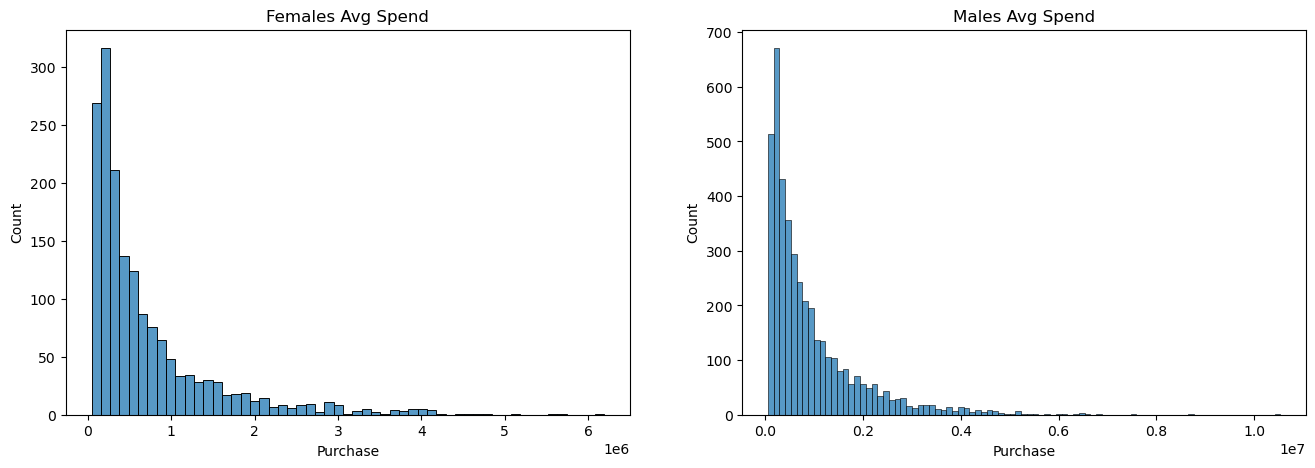

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=avgamt_gender[avgamt_gender['Gender']=='F']['Purchase'], ax=axs[0]).set_title("Females Avg Spend")
sns.histplot(data=avgamt_gender[avgamt_gender['Gender']=='M']['Purchase'], ax=axs[1]).set_title("Males Avg Spend")
plt.show()

### <code style="background:yellow;color:black">Inferences:</code>

**Average amount spend by males are higher than females.** 

In [29]:
avgamt_gender.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,712024.394958
M,925344.402367


In [30]:
avgamt_gender.groupby(['Gender'])['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

### <code style="background:yellow;color:black">Inferences:</code>

1. **Average amount for the males is 925344 for the entire population whereas it's much lesser for females(712024).**
2. **Total amount spend by males is around 4 billion whereas for females it's 1.2 billion.**   

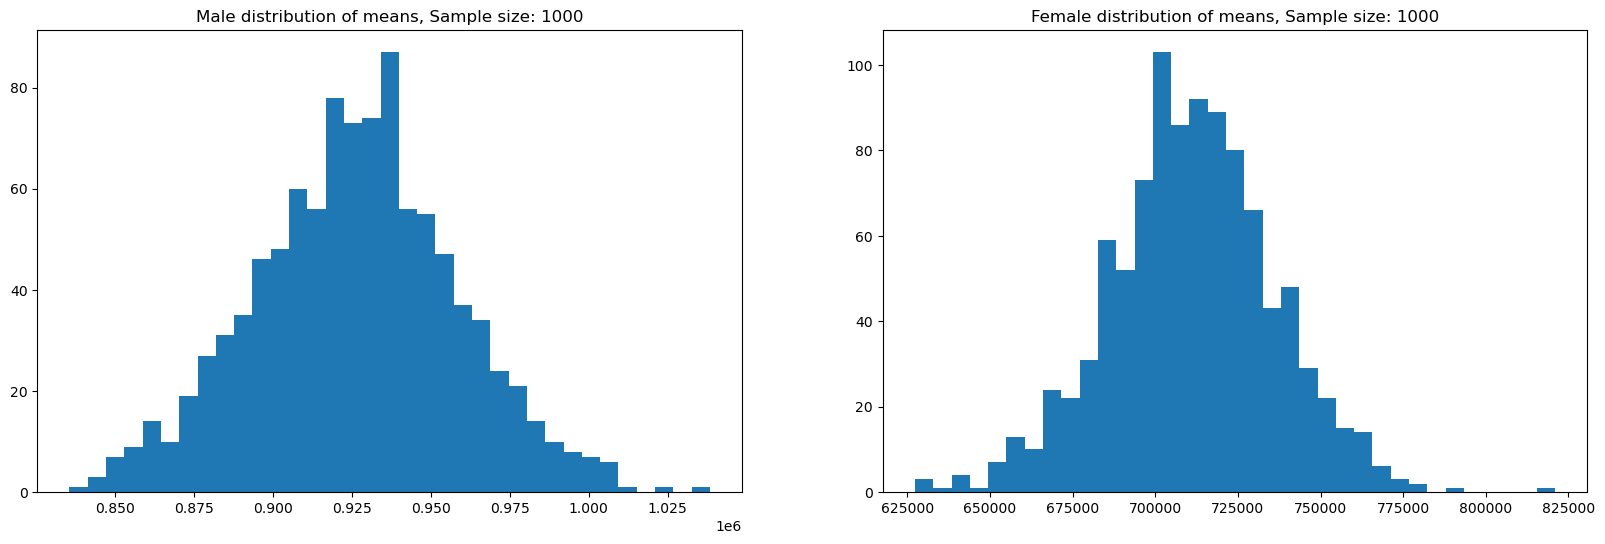

In [31]:
avgamt_male = avgamt_gender[avgamt_gender['Gender']=='M']
avgamt_female = avgamt_gender[avgamt_gender['Gender']=='F']

#Finding the sample(sample size=1000) for avg purchase amount for males and females 
genders = ["M", "F"]

sample_size = 1000

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avgamt_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = avgamt_female.sample(sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 1000")
axis[1].set_title("Female distribution of means, Sample size: 1000")

plt.show()

### <code style="background:yellow;color:black">Inferences:</code>

**The means sample seems to be normally distributed for both males and females. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.** 

# <code style="background:yellow;color:black">Given in Question:</code>

* **Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.**
* **The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.**

**<code style="background:yellow;color:black">Calculating 90% confidence interval for sample size 1000:</code>**

In [42]:
# Taking the values for z at 90%, 95% and 99% confidence interval as:

z90 = 1.645 #90% Confidence Interval
z95 = 1.960 #95% Confidence Interval
z99 = 2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))
print('-------------------------------------------------------------')

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))
print('-------------------------------------------------------------')

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))
print('-------------------------------------------------------------')

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std() / np.sqrt(1000)))
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std() / np.sqrt(1000)))
print('-------------------------------------------------------------')

sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male = pd.Series(male_means).std()
sample_std_female = pd.Series(female_means).std()

sample_std_error_male = sample_std_male / np.sqrt(1000)
sample_std_error_female = sample_std_female / np.sqrt(1000)

Upper_Limit_male = z90 * sample_std_error_male + sample_mean_male
Lower_Limit_male = sample_mean_male - z90 * sample_std_error_male

Upper_Limit_female = z90 * sample_std_error_female + sample_mean_female
Lower_Limit_female = sample_mean_female - z90 * sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

-------------------------------------------------------------
Sample avg spend amount for Male: 924917.09
Sample avg spend amount for Female: 712986.52

-------------------------------------------------------------
Sample std for Male: 25141.14
Sample std for Female: 20799.35

-------------------------------------------------------------
Sample std error for Male: 795.03
Sample std error for Female: 657.73

-------------------------------------------------------------
Male_CI:  [923609.264740931, 926224.9220977357]
Female_CI:  [711904.5541033915, 714068.4958486087]


### <code style="background:yellow;color:black">Inferences:</code>

* **Now using the Confidence interval at 90%, we can say that:**
* Average amount spend by male customers lie in the range **9,24,653.04 - 9,28,001.53**
* Average amount spend by female customers lie in range **7,09,569.36 - 7,12,174.51**

**<code style="background:yellow;color:black">Calculating 95% confidence interval for sample size 1000:**</code>

In [41]:
# Taking the values for z at 90%, 95% and 99% confidence interval as:

z90 = 1.645 #90% Confidence Interval
z95 = 1.960 #95% Confidence Interval
z99 = 2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))
print('------------------------------------------------------------')

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))
print('------------------------------------------------------------')

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))
print('------------------------------------------------------------')

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std() / np.sqrt(1000))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std() / np.sqrt(1000)))
print('------------------------------------------------------------')

sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male = pd.Series(male_means).std()
sample_std_female = pd.Series(female_means).std()

sample_std_error_male = sample_std_male / np.sqrt(1000)
sample_std_error_female = sample_std_female / np.sqrt(1000)

Upper_Limit_male = z95 * sample_std_error_male + sample_mean_male
Lower_Limit_male = sample_mean_male - z95 * sample_std_error_male

Upper_Limit_female = z95 * sample_std_error_female + sample_mean_female
Lower_Limit_female = sample_mean_female - z95 * sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

------------------------------------------------------------
Sample avg spend amount for Male: 924917.09
Sample avg spend amount for Female: 712986.52

------------------------------------------------------------
Sample std for Male: 25141.14
Sample std for Female: 20799.35

------------------------------------------------------------
Sample std error for Male: 795.03
Sample std error for Female: 657.73

------------------------------------------------------------
Male_CI:  [923358.829462088, 926475.3573765787]
Female_CI:  [711697.3681916154, 714275.6817603847]


### <code style="background:yellow;color:black">Inferences:</code>

* **Now using the Confidence interval at 90%, we can say that:**
* Average amount spend by male customers lie in the range **9,24,332.44 - 9,28,322.13**
* Average amount spend by female customers lie in range **7,09,319.93 - 7,12,423.94**

**<code style="background:yellow;color:black">Calculating 99% confidence interval for sample size 1000:</code>**

In [40]:
# Taking the values for z at 90%, 95% and 99% confidence interval as:

z90 = 1.645 #90% Confidence Interval
z95 = 1.960 #95% Confidence Interval
z99 = 2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))
print('------------------------------------------------------------')

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))
print('------------------------------------------------------------')

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))
print('------------------------------------------------------------')

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std() / np.sqrt(1000))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std() / np.sqrt(1000)))
print('------------------------------------------------------------')

sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male = pd.Series(male_means).std()
sample_std_female = pd.Series(female_means).std()

sample_std_error_male = sample_std_male / np.sqrt(1000)
sample_std_error_female = sample_std_female / np.sqrt(1000)

Upper_Limit_male = z99 * sample_std_error_male + sample_mean_male
Lower_Limit_male = sample_mean_male - z99 * sample_std_error_male

Upper_Limit_female = z99 * sample_std_error_female + sample_mean_female
Lower_Limit_female = sample_mean_female - z99 * sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

------------------------------------------------------------
Sample avg spend amount for Male: 924917.09
Sample avg spend amount for Female: 712986.52

------------------------------------------------------------
Sample std for Male: 25141.14
Sample std for Female: 20799.35

------------------------------------------------------------
Sample std error for Male: 795.03
Sample std error for Female: 657.73

------------------------------------------------------------
Male_CI:  [922869.0893612393, 926965.0974774273]
Female_CI:  [711292.2046308088, 714680.8453211914]


### <code style="background:yellow;color:black">Inferences:</code>

* **Now using the Confidence interval at 90%, we can say that:**
* Average amount spend by male customers lie in the range **9,23,705.49 - 9,28,949.08**
* Average amount spend by female customers lie in range **7,08,832.16 - 7,12,911.71**
* **By increasing the sample size we can see confidence interval is more closer to the population mean.**

**<code style="background:yellow;color:black">Calculating 90% confidence interval for sample size 1500:</code>**

In [39]:
# Finding the sample(sample size = 1000) avg purchase amount for males and females 

genders = ["M", "F"]

sample_size = 1500

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avgamt_male.sample(sample_size, replace = True)['Purchase'].mean()
    female_mean = avgamt_female.sample(sample_size, replace = True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)
    
#Taking the values for z at 90%, 95% and 99% confidence interval as:

z90 = 1.645 #90% Confidence Interval
z95 = 1.960 #95% Confidence Interval
z99 = 2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))
print('------------------------------------------------------------')

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))
print('------------------------------------------------------------')

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))
print('------------------------------------------------------------')

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std() / np.sqrt(1500))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std() / np.sqrt(1500)))
print('------------------------------------------------------------')

sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male = pd.Series(male_means).std()
sample_std_female = pd.Series(female_means).std()

sample_std_error_male = sample_std_male / np.sqrt(1500)
sample_std_error_female = sample_std_female / np.sqrt(1500)

Upper_Limit_male = z90 * sample_std_error_male + sample_mean_male
Lower_Limit_male = sample_mean_male - z90 * sample_std_error_male

Upper_Limit_female = z90 * sample_std_error_female + sample_mean_female
Lower_Limit_female = sample_mean_female - z90 * sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

------------------------------------------------------------
Sample avg spend amount for Male: 924917.09
Sample avg spend amount for Female: 712986.52

------------------------------------------------------------
Sample std for Male: 25141.14
Sample std for Female: 20799.35

------------------------------------------------------------
Sample std error for Male: 649.14
Sample std error for Female: 537.04

------------------------------------------------------------
Male_CI:  [923849.2557749785, 925984.9310636881]
Female_CI:  [712103.0994578518, 713869.9504941483]


### <code style="background:yellow;color:black">Inferences:</code>

* **Now using the Confidence interval at 95%, we can say that:**
* Average amount spend by male customers lie in the range **9,24,501.55 - 9,26,756.29**
* Average amount spend by female customers lie in range **7,09,112.23 - 7,10,823.50**
* **By increasing the sample size we can see confidence interval is more closer to the population mean.**

**<code style="background:yellow;color:black">Calculating 95% confidence interval for sample size 1500:</code>**

In [37]:
print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))
print('------------------------------------------------------------')

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))
print('------------------------------------------------------------')

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))
print('------------------------------------------------------------')

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std() / np.sqrt(1500))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std() / np.sqrt(1500)))
print('------------------------------------------------------------')

sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male = pd.Series(male_means).std()
sample_std_female = pd.Series(female_means).std()

sample_std_error_male = sample_std_male / np.sqrt(1500)
sample_std_error_female = sample_std_female / np.sqrt(1500)

Upper_Limit_male = z95 * sample_std_error_male + sample_mean_male
Lower_Limit_male = sample_mean_male - z95 * sample_std_error_male

Upper_Limit_female = z95 * sample_std_error_female + sample_mean_female
Lower_Limit_female = sample_mean_female - z95 * sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

------------------------------------------------------------
Sample avg spend amount for Male: 925628.92
Sample avg spend amount for Female: 709967.87

------------------------------------------------------------
Sample std for Male: 26542.81
Sample std for Female: 20145.11

------------------------------------------------------------
Sample std error for Male: 685.33
Sample std error for Female: 520.14

------------------------------------------------------------
Male_CI:  [924285.6732890998, 926972.175965567]
Female_CI:  [708948.3847046125, 710987.351078054]


### <code style="background:yellow;color:black">Inferences:</code>

* **Now using the Confidence interval at 99%, we can say that:**
* Average amount spend by male customers lie in the range **9,24,285.67 - 9,26,972.17**
* Average amount spend by female customers lie in range **7,08,948.38 - 7,10,987.35**
* **By increasing the sample size we can see confidence interval is more closer to the population mean.**

**<code style="background:yellow;color:black">Calculating 99% confidence interval for sample size 1500:</code>**

In [43]:
print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))
print('------------------------------------------------------------')

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))
print('------------------------------------------------------------')

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))
print('------------------------------------------------------------')

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std() / np.sqrt(1500))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std() / np.sqrt(1500)))
print('------------------------------------------------------------')

sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male = pd.Series(male_means).std()
sample_std_female = pd.Series(female_means).std()

sample_std_error_male = sample_std_male / np.sqrt(1500)
sample_std_error_female = sample_std_female / np.sqrt(1500)

Upper_Limit_male = z99 * sample_std_error_male + sample_mean_male
Lower_Limit_male = sample_mean_male - z99 * sample_std_error_male

Upper_Limit_female = z99 * sample_std_error_female + sample_mean_female
Lower_Limit_female = sample_mean_female - z99 * sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

------------------------------------------------------------
Sample avg spend amount for Male: 924917.09
Sample avg spend amount for Female: 712986.52

------------------------------------------------------------
Sample std for Male: 25141.14
Sample std for Female: 20799.35

------------------------------------------------------------
Sample std error for Male: 649.14
Sample std error for Female: 537.04

------------------------------------------------------------
Male_CI:  [923244.9051081735, 926589.2817304932]
Female_CI:  [711603.1182071551, 714369.931744845]


**<code style="background:yellow;color:black">CLT and Confidence interval considering marital status:</code>**

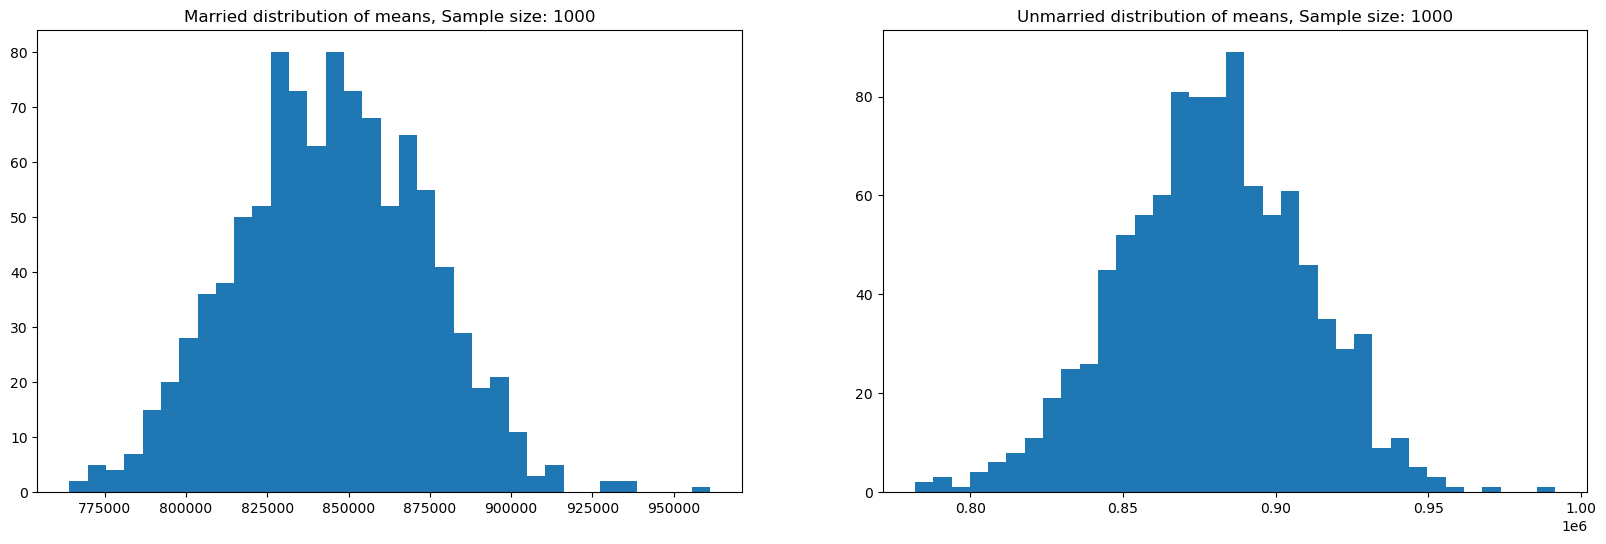

In [46]:
avg_Marital = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_Marital = avg_Marital.reset_index()

avgamt_married = avg_Marital[avg_Marital['Marital_Status'] == 1]
avgamt_single = avg_Marital[avg_Marital['Marital_Status'] == 0]

sample_size = 1000
num_repitions = 1000
married_means = []
single_means = []

for i in range(num_repitions):
    avg_married = avg_Marital[avg_Marital['Marital_Status'] == 1].sample(sample_size, replace = True)['Purchase'].mean()
    avg_single = avg_Marital[avg_Marital['Marital_Status'] == 0].sample(sample_size, replace = True)['Purchase'].mean()
    
    married_means.append(avg_married)
    single_means.append(avg_single)
    
    
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))

axis[0].hist(married_means, bins = 35)
axis[1].hist(single_means, bins = 35)
axis[0].set_title("Married distribution of means, Sample size: 1000")
axis[1].set_title("Unmarried distribution of means, Sample size: 1000")

plt.show()

### <code style="background:yellow;color:black">Inferences:</code>

**The means sample seems to be normally distributed for both married and singles. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.**

In [47]:
avg_Marital['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

**<code style="background:yellow;color:black">Calculating 90% confidence interval for avg expenses for married/single for sample size 1000:</code>**

In [48]:
# Taking the values for z at 90%, 95% and 99% confidence interval as:

z90 = 1.645 #90% Confidence Interval
z95 = 1.960 #95% Confidence Interval
z99 = 2.576 #99% Confidence Interval

print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))
print('------------------------------------------------------------')

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))
print('------------------------------------------------------------')

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))
print('------------------------------------------------------------')

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std() / np.sqrt(1000))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std() / np.sqrt(1000)))
print('------------------------------------------------------------')

sample_mean_married = np.mean(married_means)
sample_mean_single = np.mean(single_means)

sample_std_married = pd.Series(married_means).std()
sample_std_single = pd.Series(single_means).std()

sample_std_error_married = sample_std_married / np.sqrt(1000)
sample_std_error_single = sample_std_single / np.sqrt(1000)

Upper_Limit_married = z90 * sample_std_error_male + sample_mean_married
Lower_Limit_married = sample_mean_married - z90 * sample_std_error_married

Upper_Limit_single = z90 * sample_std_error_single + sample_mean_single
Lower_Limit_single = sample_mean_single - z90 * sample_std_error_single

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

------------------------------------------------------------
Sample avg spend amount for Married: 844749.93
Sample avg spend amount for Single: 879117.56

------------------------------------------------------------
Sample std for Married: 28912.06
Sample std for Single: 30206.29

------------------------------------------------------------
Sample std error for Married: 914.28
Sample std error for Single: 955.21

------------------------------------------------------------


**<code style="background:yellow;color:black">Calculating 95% confidence interval for avg expenses for married/single for sample size 1000:</code>**

In [49]:
# Taking the values for z at 90%, 95% and 99% confidence interval as:
z90 = 1.645 #90% Confidence Interval
z95 = 1.960 #95% Confidence Interval
z99 = 2.576 #99% Confidence Interval

print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))
print('------------------------------------------------------------')

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))
print('------------------------------------------------------------')

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))
print('------------------------------------------------------------')

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std() / np.sqrt(1000))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std() / np.sqrt(1000)))
print('------------------------------------------------------------')

sample_mean_married = np.mean(married_means)
sample_mean_single = np.mean(single_means)

sample_std_married = pd.Series(married_means).std()
sample_std_single = pd.Series(single_means).std()

sample_std_error_married = sample_std_married / np.sqrt(1000)
sample_std_error_single = sample_std_single / np.sqrt(1000)

Upper_Limit_married = z95 * sample_std_error_male + sample_mean_married
Lower_Limit_married = sample_mean_married - z95 * sample_std_error_married

Upper_Limit_single = z95 * sample_std_error_single + sample_mean_single
Lower_Limit_single = sample_mean_single - z95 * sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

------------------------------------------------------------
Sample avg spend amount for Married: 844749.93
Sample avg spend amount for Single: 879117.56

------------------------------------------------------------
Sample std for Married: 28912.06
Sample std for Single: 30206.29

------------------------------------------------------------
Sample std error for Married: 914.28
Sample std error for Single: 955.21

------------------------------------------------------------
Married_CI:  [842957.9460787694, 846022.2512682738]
Single_CI:  [877245.3525686449, 880989.7630133551]


**<code style="background:yellow;color:black">Calculating 99% confidence interval for avg expenses for married/single for sample size 1000:</code>**

In [50]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90 = 1.645 #90% Confidence Interval
z95 = 1.960 #95% Confidence Interval
z99 = 2.576 #99% Confidence Interval

print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))
print('------------------------------------------------------------')

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))
print('------------------------------------------------------------')

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))
print('------------------------------------------------------------')

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std() / np.sqrt(1000))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std() / np.sqrt(1000)))
print('------------------------------------------------------------')

sample_mean_married = np.mean(married_means)
sample_mean_single = np.mean(single_means)

sample_std_married = pd.Series(married_means).std()
sample_std_single = pd.Series(single_means).std()

sample_std_error_married = sample_std_married / np.sqrt(1000)
sample_std_error_single = sample_std_single / np.sqrt(1000)

Upper_Limit_married = z99 * sample_std_error_male + sample_mean_married
Lower_Limit_married = sample_mean_married - z99 * sample_std_error_married

Upper_Limit_single = z99 * sample_std_error_single + sample_mean_single
Lower_Limit_single = sample_mean_single - z99 * sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

------------------------------------------------------------
Sample avg spend amount for Married: 844749.93
Sample avg spend amount for Single: 879117.56

------------------------------------------------------------
Sample std for Married: 28912.06
Sample std for Single: 30206.29

------------------------------------------------------------
Sample std error for Married: 914.28
Sample std error for Single: 955.21

------------------------------------------------------------
Married_CI:  [842394.7498513826, 846422.1223861598]
Single_CI:  [876656.9452130477, 881578.1703689523]


### <code style="background:yellow;color:black">Inferences:</code>

**For married and singles, it can be seen with larger sample size the sample mean gets closer to tthe population mean. And at greater confidence interval, the range increases.**

In [51]:
avgamt_age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avgamt_age = avgamt_age.reset_index()

avgamt_age['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

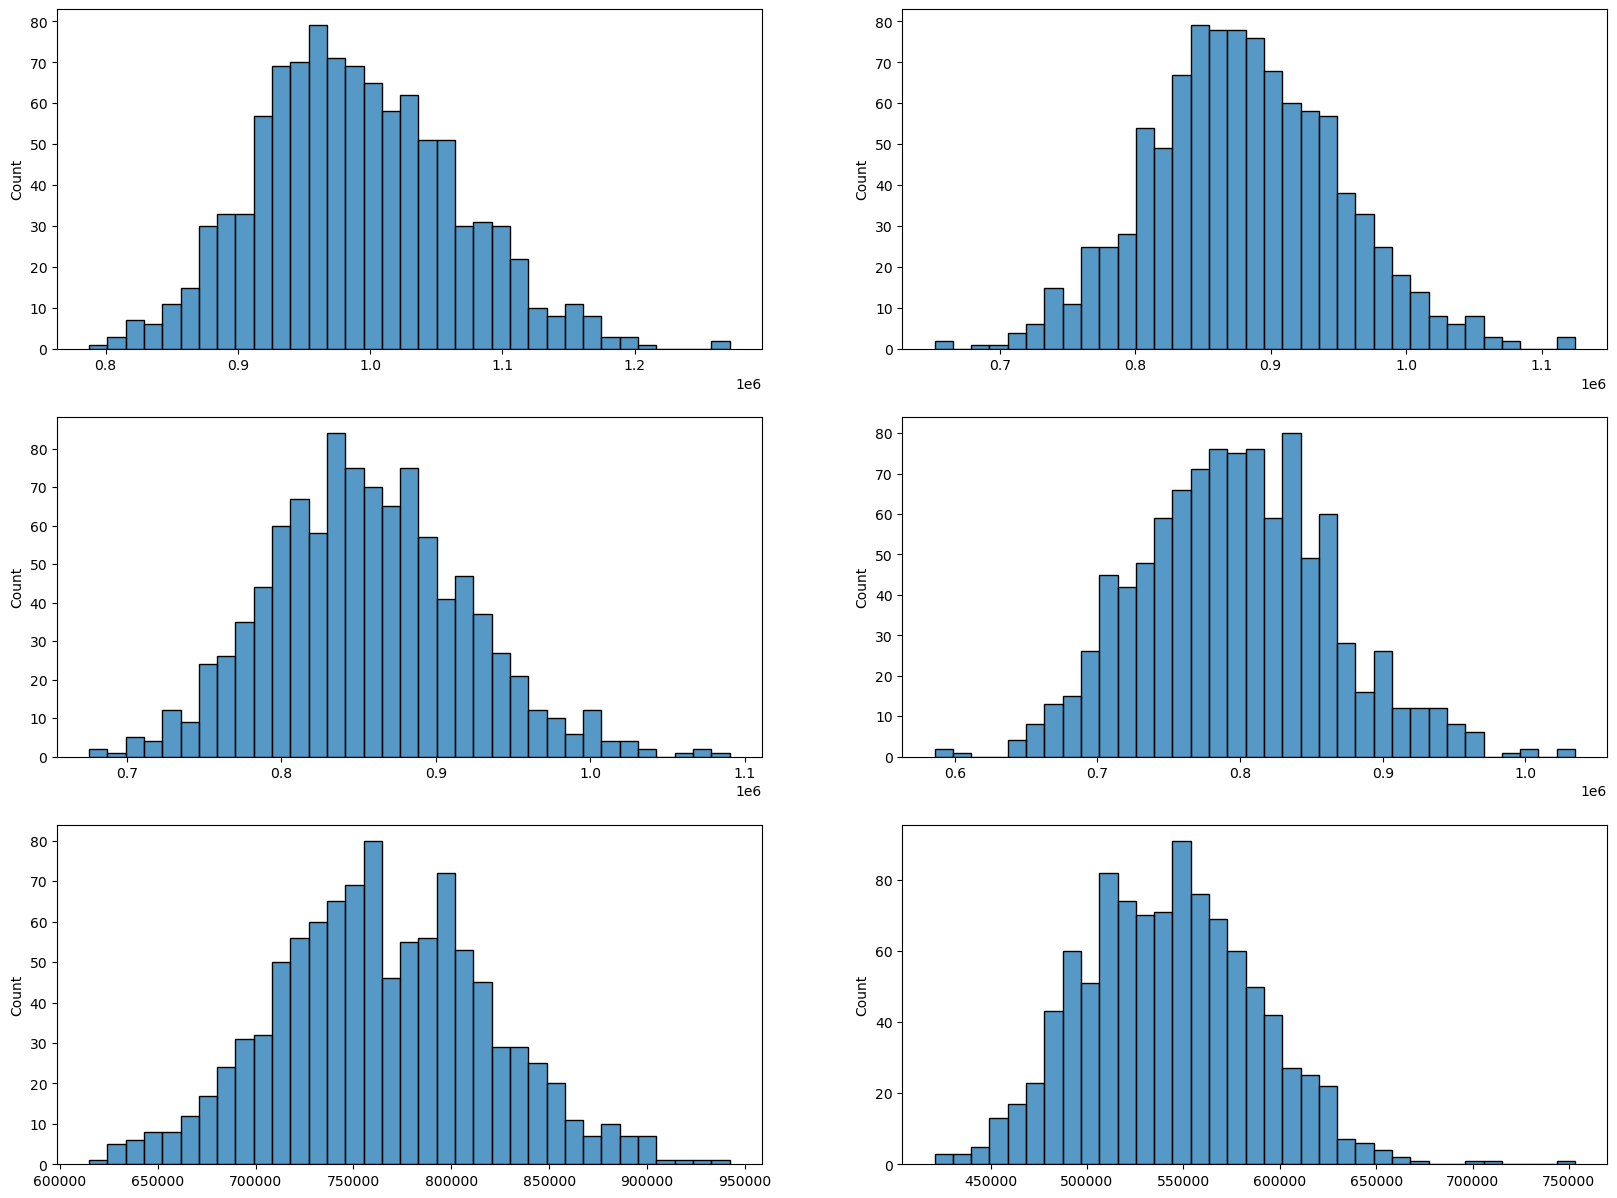

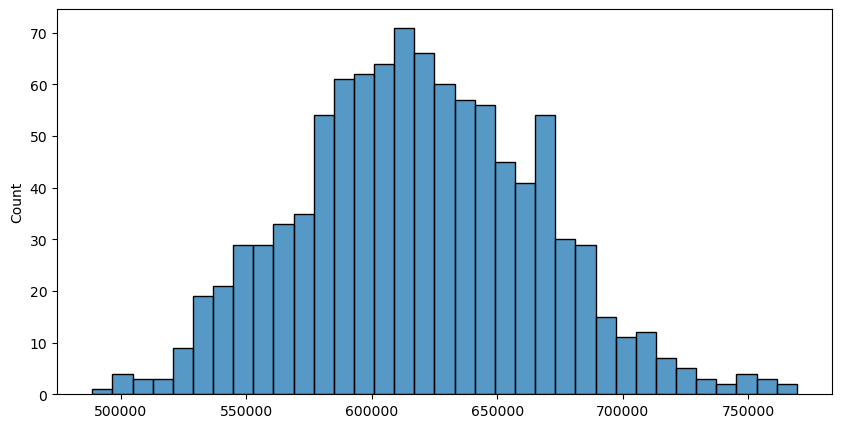

In [52]:
sample_size = 200
num_repitions = 1000

all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    
for i in age_intervals:
    for j in range(num_repitions):
        
        mean = avgamt_age[avgamt_age['Age'] == i].sample(sample_size, replace = True)['Purchase'].mean()
        all_sample_means[i].append(mean)
        

        
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[0,0])
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[0,1])
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[1,0])
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[1,1])
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(all_sample_means['55+'],bins=35,ax=axis[2,1])

plt.show()

plt.figure(figsize = (10, 5))
sns.histplot(all_sample_means['0-17'],bins = 35)
plt.show()

### <code style="background:yellow;color:black">Inferences:</code>

**The means sample seems to be normally distributed for all age groups. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.**

**<code style="background:yellow;color:black">Calculating 90% confidence interval for avg expenses for different age groups for sample size 200:</code>**

In [53]:
z90 = 1.645 #90% Confidence Interval
z95 = 1.960 #95% Confidence Interval
z99 = 2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_population_means = {}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i] = []
    population_mean = avgamt_age[avgamt_age['Age'] == i]['Purchase'].mean()
    all_population_means[i].append(population_mean)
    
print("All age group population mean: \n", all_population_means)
print("------------------------------------------------------------------------------")
    
for i in age_intervals:
    for j in range(num_repitions):
        
        mean = avgamt_age[avgamt_age['Age'] == i].sample(sample_size, replace = True)['Purchase'].mean()
        all_sample_means[i].append(mean)
        
        
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avgamt_age[avgamt_age['Age'] == val] 
    
    std_error = z90 * new_df['Purchase'].std() / np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}
------------------------------------------------------------------------------
For age 26-35 confidence interval of means: (952206.28, 1027112.35)
For age 36-45 confidence interval of means: (832398.89, 926932.53)
For age 18-25 confidence interval of means: (810187.65, 899538.59)
For age 46-50 confidence interval of means: (726209.00, 858888.57)
For age 51-55 confidence interval of means: (703772.36, 822629.48)
For age 55+ confidence interval of means: (487032.92, 592361.57)
For age 0-17 confidence interval of means: (542320.46, 695415.16)


In [52]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age'] == i].sample(sample_size, replace = True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avgamt_age[avgamt_age['Age'] == val] 
    
    std_error = z95 * new_df['Purchase'].std() / np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (945034.42, 1034284.21)
For age 36-45 confidence interval of means: (823347.80, 935983.62)
For age 18-25 confidence interval of means: (801632.78, 908093.46)
For age 46-50 confidence interval of means: (713505.63, 871591.93)
For age 51-55 confidence interval of means: (692392.43, 834009.42)
For age 55+ confidence interval of means: (476948.26, 602446.23)
For age 0-17 confidence interval of means: (527662.46, 710073.17)


In [53]:
z90 = 1.645 #90% Confidence Interval
z95 = 1.960 #95% Confidence Interval
z99 = 2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age'] == i].sample(sample_size, replace = True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avgamt_age[avgamt_age['Age'] == val] 
    
    std_error = z99 * new_df['Purchase'].std() / np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (931009.46, 1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)


# <code style="background:yellow;color:black">6. Recommendations:</code>

**1. Men spent more money than women, company can focus on retaining the male customers and getting more male customers.**<br>

**2. Product_Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are in more demand. Company can focus on selling more of these products.**<br>

**3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.<br>**

**4. Customers in the age 26-35 spend more money than the others, So company should focus on acquisition of customers who are in the age 26-35.<br>**

**5. We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.<br>**

**6. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.<br>**

**7. Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it.<br>**

**8. The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business.<br>**

**9. The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.<br>**

**10. The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.<br>**

**11. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.<br>**

**12. We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.**